In [1]:
# -- coding: UTF-8 --
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, WeekdayLocator, \
    DayLocator, MONDAY, date2num, num2date
from matplotlib.finance import candlestick_ohlc
import datetime
import numpy as np
from numpy import genfromtxt
import pandas as pd
import time
from draw import *
from utils import *
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
import os
from Analyze import *
from Pattern import *
import traceback
from MultiThread import *

C:\Users\user\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import pickle
data = pd.read_csv('TX00/TX00_50000.csv') #, encoding='utf-8')
items = [i for i in data]
time = data[items[0]]
infos = dict()
idx = []

sign = dict()
sign['up'] = data['Up-Down'][4][:2]
sign['down'] = data['Up-Down'][1][:2]
sign['K_up'] = data['9-K'][5][-2:]
sign['K_down'] = data['9-K'][0][-2:]

load_data = True
if load_data == True:
    days = Days()
    for i in range(50000):
        h, m = time[i].split(' ')[-1].split(':')[0], time[i].split(' ')[-1].split(':')[1]
        dt = time[i].split(' ')[0]
        if 8*60+45 <= int(h)*60+int(m) <= 10*60+45: #13*60+45:
            idx += [i]
        else:
            continue
        d = process(data, i, sign)
        print i, d
        days.update(dt, d)


    with open('0917-infos_50000.pkl', 'wb') as output:
        pickle.dump(days, output, pickle.HIGHEST_PROTOCOL)
else:
    with open('0917-infos_50000.pkl', 'rb') as input:
        days = pickle.load(input)

180 (10829, 10833, 10828, 10832, 4, 209, 10830.0, 10831.4, 34.86, -42.9, 61.08)
181 (10829, 10832, 10827, 10828, -1, 438, 10829.6, 10831.8, -29.57, -46.93, -33.86)
182 (10831, 10833, 10829, 10829, -1, 221, 10830.2, 10832.0, -39.8, -55.61, -39.36)
183 (10831, 10831, 10828, 10830, -1, 263, 10830.6, 10831.7, -54.71, -63.51, -45.25)
184 (10830, 10831, 10829, 10831, 1, 110, 10831.6, 10831.4, -58.73, -67.91, 51.4)
185 (10831, 10831, 10829, 10830, -1, 155, 10832.8, 10830.8, -61.42, -72.5, -45.47)
186 (10831, 10833, 10830, 10831, 0, 260, 10834.0, 10830.6, -68.8, -78.04, 50.39)
187 (10835, 10835, 10831, 10831, -4, 258, 10833.8, 10830.2, -76.53, -82.66, -50.39)
188 (10836, 10838, 10834, 10835, -2, 505, 10832.8, 10829.6, -88.13, 85.72, -69.68)
189 (10836, 10838, 10835, 10837, 1, 752, 10831.2, 10828.1, 92.2, 84.51, 82.28)
190 (10830, 10836, 10829, 10836, 6, 825, 10828.8, 10826.0, 90.8, 80.67, 80.9)
191 (10826, 10830, 10823, 10830, 4, 417, 10827.2, 10824.4, 86.2, 75.61, 69.47)
192 (10827, 10828, 10

1348 (10830, 10833, 10826, 10827, -3, 895, 10828.4, 10826.3, -70.18, -80.87, -56.78)
1349 (10830, 10835, 10829, 10830, 0, 1760, 10828.4, 10825.8, -81.94, -86.21, 84.59)
1350 (10828, 10831, 10826, 10830, 3, 1163, 10827.6, 10825.0, 87.62, -88.34, 84.59)
1351 (10828, 10830, 10825, 10827, -1, 850, 10826.8, 10824.1, -85.28, -88.69, -77.56)
1352 (10827, 10829, 10826, 10828, 1, 452, 10825.8, 10823.6, 90.42, 90.4, 88.31)
1353 (10826, 10829, 10826, 10827, 1, 652, 10824.2, 10822.2, -90.17, -90.4, 86.85)
1354 (10825, 10828, 10825, 10826, 0, 757, 10823.2, 10820.7, -91.51, 90.51, 85.39)
1355 (10823, 10828, 10822, 10826, 4, 1769, 10822.4, 10818.4, 91.8, 90.01, 85.39)
1356 (10821, 10823, 10820, 10822, 2, 689, 10821.4, 10814.9, 91.71, 89.11, 79.61)
1357 (10823, 10823, 10818, 10820, -2, 917, 10821.4, 10811.8, -90.42, 87.82, -75.76)
1358 (10822, 10824, 10821, 10822, 0, 995, 10820.2, 10809.1, 91.34, 86.52, 89.21)
1359 (10822, 10824, 10818, 10822, 1, 1303, 10818.2, 10806.3, 89.86, 84.11, 89.21)
1360 (1082

2497 (10746, 10747, 10742, 10744, -3, 634, 10746.0, 10750.9, -18.75, -27.82, -30.94)
2498 (10748, 10751, 10744, 10747, -1, 658, 10746.6, 10751.9, -23.58, -32.35, -39.34)
2499 (10748, 10751, 10747, 10748, 1, 502, 10748.0, 10752.0, -25.85, -36.74, 42.41)
2500 (10745, 10748, 10744, 10747, 3, 478, 10749.8, 10752.3, -26.87, -42.19, 38.58)
2501 (10747, 10748, 10743, 10744, -3, 1027, 10752.4, 10752.2, -30.78, -49.85, -26.88)
2502 (10754, 10754, 10746, 10747, -7, 1053, 10755.8, 10752.6, -43.78, -59.38, -31.71)
2503 (10757, 10760, 10753, 10754, -3, 333, 10757.2, 10753.2, -62.9, -67.18, -47.71)
2504 (10760, 10763, 10757, 10757, -3, 469, 10756.0, 10752.9, -72.13, 69.32, -57.69)
2505 (10761, 10764, 10759, 10760, -1, 710, 10754.8, 10752.5, 77.63, 67.91, -69.29)
2506 (10753, 10761, 10753, 10761, 7, 888, 10752.0, 10751.6, 77.56, 63.05, 73.21)
2507 (10747, 10754, 10747, 10754, 6, 259, 10749.4, 10750.2, 66.34, 55.79, 60.77)
2508 (10751, 10751, 10747, 10748, -3, 210, 10749.2, 10749.8, -55.07, 50.51, -42

3638 (10711, 10711, 10707, 10709, -2, 431, 10710.8, 10710.9, -56.27, 55.1, -43.07)
3639 (10714, 10714, 10710, 10711, -2, 238, 10712.0, 10711.2, 59.41, 54.52, -48.58)
3640 (10708, 10715, 10707, 10713, 5, 327, 10711.6, 10711.7, 55.77, 52.08, 54.13)
3641 (10713, 10714, 10707, 10708, -5, 489, 10711.6, 10711.9, -47.95, -50.23, -40.57)
3642 (10714, 10715, 10712, 10713, -2, 242, 10711.2, 10712.9, 54.06, 51.37, -53.13)
3643 (10709, 10715, 10708, 10715, 6, 346, 10711.0, 10712.7, 51.68, 50.03, 58.97)
3644 (10714, 10715, 10707, 10709, -4, 738, 10710.4, 10711.7, -44.19, -49.2, -44.26)
3645 (10706, 10714, 10706, 10713, 7, 638, 10711.8, 10711.1, 49.62, -51.71, 54.73)
3646 (10711, 10712, 10703, 10706, -6, 931, 10712.2, 10710.4, -45.49, -52.75, -32.3)
3647 (10712, 10713, 10708, 10712, 0, 754, 10714.6, 10711.0, -57.7, 56.39, 48.92)
3648 (10716, 10717, 10712, 10712, -4, 415, 10714.4, 10711.2, -60.24, 55.73, -48.92)
3649 (10716, 10717, 10712, 10716, 1, 796, 10713.0, 10711.2, 64.04, 53.48, 62.66)
3650 (10

4776 (10706, 10714, 10705, 10713, 6, 1031, 10713.2, 10719.4, 20.66, 20.07, 39.06)
4777 (10712, 10714, 10704, 10707, -5, 1578, 10715.0, 10721.1, -14.92, -19.78, -18.82)
4778 (10718, 10718, 10709, 10712, -7, 1631, 10717.8, 10723.5, -18.21, -22.21, -24.17)
4779 (10716, 10721, 10713, 10719, 4, 997, 10720.4, 10725.0, 22.48, -24.2, 35.46)
4780 (10722, 10723, 10714, 10715, -7, 834, 10722.2, 10725.9, -21.22, -25.07, -17.94)
4781 (10720, 10723, 10712, 10722, 1, 2204, 10725.6, 10727.7, 26.47, -26.99, 28.94)
4782 (10726, 10727, 10718, 10721, -4, 1537, 10727.2, 10728.6, -21.84, -27.25, -23.58)
4783 (10728, 10729, 10723, 10725, -3, 790, 10729.2, 10729.5, -25.95, -29.96, -31.08)
4784 (10732, 10732, 10726, 10728, -4, 518, 10729.6, 10730.7, -33.04, 31.96, -38.4)
4785 (10730, 10740, 10729, 10732, 2, 1019, 10729.6, 10731.6, 34.85, 31.43, 51.28)
4786 (10731, 10732, 10729, 10730, -1, 245, 10729.8, 10733.1, 25.81, -29.71, -43.73)
4787 (10728, 10733, 10727, 10731, 4, 437, 10730.0, 10734.4, 25.75, -31.66, 46

7027 (10865, 10866, 10862, 10863, -2, 443, 10866.2, 10866.5, -21.44, -24.84, -24.92)
7028 (10865, 10868, 10863, 10865, 0, 461, 10866.6, 10867.4, 26.61, 26.54, 31.21)
7029 (10869, 10869, 10865, 10865, -4, 357, 10867.2, 10868.8, -24.91, -26.51, -31.21)
7030 (10868, 10871, 10867, 10869, 0, 334, 10867.4, 10870.1, 27.99, 27.31, 46.11)
7031 (10866, 10869, 10865, 10869, 4, 284, 10866.8, 10871.0, 25.32, -26.98, 46.11)
7032 (10868, 10868, 10865, 10865, -3, 405, 10866.8, 10872.0, -21.31, -27.81, -22.41)
7033 (10865, 10869, 10864, 10868, 2, 484, 10868.2, 10873.5, 24.82, -31.06, 30.45)
7034 (10866, 10867, 10862, 10866, 0, 1031, 10870.4, 10874.4, -22.95, -34.17, 14.0)
7035 (10869, 10869, 10866, 10866, -3, 509, 10872.8, 10875.4, -24.9, -39.78, -14.0)
7036 (10871, 10872, 10866, 10869, -3, 730, 10875.2, 10876.5, -37.35, -47.23, -18.11)
7037 (10878, 10878, 10868, 10872, -7, 1280, 10877.2, 10877.6, -47.2, -52.17, -23.67)
7038 (10879, 10883, 10879, 10879, 1, 411, 10878.8, 10878.2, -57.46, 54.65, 55.45)
7

8185 (10941, 10944, 10939, 10940, -1, 403, 10941.8, 10938.5, -69.37, -71.94, -55.15)
8186 (10944, 10945, 10941, 10941, -2, 466, 10941.8, 10937.9, -74.06, 73.22, -59.98)
8187 (10940, 10945, 10939, 10943, 2, 537, 10940.8, 10936.9, 77.76, 72.8, 69.76)
8188 (10944, 10946, 10939, 10941, -3, 1147, 10938.4, 10935.8, -74.97, 70.33, -65.22)
8189 (10940, 10945, 10939, 10944, 4, 1655, 10936.8, 10934.9, 76.34, 68.01, 79.53)
8190 (10936, 10940, 10935, 10940, 4, 493, 10935.2, 10934.3, 67.45, 63.84, 73.28)
8191 (10931, 10936, 10931, 10936, 5, 231, 10934.0, 10934.0, 55.03, -62.04, 64.64)
8192 (10934, 10935, 10931, 10931, -2, 266, 10933.0, 10933.9, -51.77, -65.54, -47.75)
8193 (10936, 10936, 10931, 10933, -3, 468, 10933.2, 10933.2, -66.12, -72.42, -56.37)
8194 (10934, 10939, 10934, 10936, 2, 819, 10933.0, 10931.9, 72.71, -75.57, 71.94)
8195 (10931, 10934, 10928, 10934, 3, 596, 10933.4, 10930.6, -70.97, -77.01, 67.09)
8196 (10931, 10933, 10929, 10931, -1, 289, 10934.0, 10929.2, -71.67, -80.03, -58.48)
8

9310 (10999, 11003, 10998, 11003, 5, 247, 10999.0, 11001.1, 37.69, 32.67, 63.96)
9311 (10998, 11000, 10995, 10998, 0, 292, 10998.8, 11000.9, 23.2, -30.17, 39.86)
9312 (10997, 11000, 10995, 10998, 2, 333, 10999.6, 11001.1, 22.3, -33.65, 39.86)
9313 (11000, 11001, 10996, 10996, -4, 511, 11000.6, 11001.9, -20.95, -39.33, -27.44)
9314 (11002, 11002, 11000, 11000, -2, 236, 11002.6, 11003.1, -31.42, -48.52, -40.99)
9315 (11002, 11004, 11001, 11002, 0, 194, 11003.2, 11003.3, -42.58, -57.07, 51.07)
9316 (11004, 11005, 11001, 11002, -1, 214, 11003.0, 11003.1, -50.24, -64.32, -51.07)
9317 (11006, 11007, 11002, 11003, -3, 199, 11002.6, 11002.9, -61.72, -71.36, -55.43)
9318 (11003, 11007, 11003, 11006, 3, 458, 11003.2, 11002.3, 71.74, -76.19, 69.73)
9319 (11001, 11004, 10999, 11003, 2, 439, 11003.6, 11000.6, -70.95, -78.41, 61.86)
9320 (11000, 11003, 11000, 11001, 1, 353, 11003.4, 10999.3, -73.08, -82.14, 55.72)
9321 (11005, 11006, 11000, 11000, -6, 590, 11003.2, 10997.8, -81.06, -86.67, -52.67)
9

10453 (10960, 10961, 10958, 10959, -1, 135, 10957.8, 10957.4, 60.84, 54.05, -53.6)
10454 (10955, 10962, 10954, 10960, 6, 404, 10958.0, 10957.4, 56.27, 50.65, 57.48)
10455 (10957, 10957, 10952, 10954, -3, 642, 10957.6, 10956.9, -44.4, -47.84, -34.89)
10456 (10959, 10959, 10956, 10957, -2, 143, 10957.8, 10957.3, -56.6, 49.56, -44.3)
10457 (10960, 10960, 10956, 10959, -1, 201, 10958.2, 10957.5, 59.9, 46.04, -51.75)
10458 (10958, 10962, 10958, 10960, 2, 426, 10957.0, 10957.2, 54.85, 39.11, 55.48)
10459 (10955, 10960, 10953, 10958, 3, 332, 10956.8, 10957.3, 42.28, 31.24, 49.68)
10460 (10960, 10960, 10954, 10955, -4, 251, 10956.2, 10957.7, -30.09, 25.71, -40.34)
10461 (10953, 10960, 10953, 10959, 6, 337, 10956.8, 10958.6, 31.5, 23.53, 50.29)
10462 (10958, 10959, 10952, 10953, -6, 542, 10956.8, 10959.5, -18.08, -19.54, -29.39)
10463 (10955, 10961, 10953, 10959, 4, 708, 10957.4, 10960.8, 23.99, 20.28, 44.29)
10464 (10958, 10958, 10954, 10955, -3, 326, 10957.8, 10961.4, -15.99, -18.42, -23.65)


11597 (10970, 10971, 10955, 10957, -13, 2235, 10969.8, 10971.8, -31.84, -43.98, -10.8)
11598 (10971, 10972, 10968, 10970, -2, 361, 10973.6, 10972.9, -43.41, -50.06, -28.93)
11599 (10975, 10975, 10970, 10972, -3, 232, 10974.2, 10973.4, -55.11, 53.38, -36.48)
11600 (10976, 10976, 10972, 10975, 0, 171, 10974.4, 10973.9, 59.94, 52.51, 53.09)
11601 (10976, 10977, 10974, 10975, -1, 124, 10974.0, 10974.0, 53.55, 48.79, -53.09)
11602 (10973, 10978, 10972, 10976, 3, 230, 10973.8, 10974.5, 49.56, 46.42, 58.8)
11603 (10973, 10977, 10972, 10973, 0, 292, 10972.2, 10974.5, -42.19, -44.84, 44.46)
11604 (10973, 10976, 10970, 10973, 0, 245, 10972.6, 10974.9, -43.29, -46.17, 44.46)
11605 (10974, 10974, 10969, 10973, -1, 362, 10973.4, 10974.8, -44.94, -47.61, -44.46)
11606 (10968, 10975, 10968, 10974, 6, 749, 10974.0, 10974.5, -47.41, -48.94, 47.27)
11607 (10976, 10976, 10967, 10968, -7, 686, 10975.2, 10974.1, -47.78, -49.71, -24.32)
11608 (10976, 10978, 10974, 10975, -2, 303, 10976.8, 10974.3, 60.56, 50

12737 (10965, 10965, 10957, 10962, -2, 1126, 10964.6, 10966.3, 31.23, -34.01, -31.52)
12738 (10962, 10967, 10962, 10964, 3, 398, 10966.4, 10967.3, -31.22, -35.4, 36.81)
12739 (10968, 10972, 10961, 10961, -7, 609, 10967.4, 10968.3, -31.45, -37.48, -20.87)
12740 (10969, 10969, 10963, 10968, 0, 576, 10968.8, 10969.5, 44.39, 40.5, 39.44)
12741 (10971, 10972, 10968, 10968, -3, 238, 10968.6, 10969.8, 44.37, 38.56, -39.44)
12742 (10970, 10972, 10968, 10971, 2, 162, 10968.0, 10970.8, 44.33, 35.65, 52.17)
12743 (10967, 10973, 10966, 10969, 1, 546, 10968.2, 10971.5, 35.94, 31.31, 42.22)
12744 (10968, 10969, 10965, 10968, 1, 447, 10969.2, 10972.0, 31.41, 29.0, 36.98)
12745 (10965, 10969, 10964, 10967, 2, 474, 10970.2, 10972.3, 28.07, 27.79, 32.05)
12746 (10972, 10972, 10960, 10965, -7, 2414, 10971.0, 10973.3, -25.43, -27.66, -22.33)
12747 (10975, 10978, 10971, 10972, -2, 417, 10973.6, 10974.4, -26.24, -28.77, -37.25)
12748 (10975, 10976, 10973, 10974, 1, 169, 10974.8, 10975.1, 30.28, 30.03, 43.97

13893 (11077, 11077, 11072, 11075, -3, 473, 11074.8, 11073.3, -74.27, 74.12, -57.9)
13894 (11075, 11079, 11075, 11078, 2, 552, 11074.4, 11072.5, 79.59, 74.04, 74.76)
13895 (11074, 11076, 11072, 11076, 2, 247, 11072.8, 11071.2, 73.55, 71.27, 70.12)
13896 (11071, 11075, 11069, 11074, 3, 387, 11072.4, 11070.4, 66.99, -70.13, 64.96)
13897 (11072, 11074, 11069, 11071, -2, 380, 11071.8, 11069.8, -63.81, -71.7, -55.82)
13898 (11071, 11073, 11070, 11073, 3, 225, 11071.8, 11069.2, -69.05, -75.65, 64.85)
13899 (11074, 11075, 11069, 11070, -4, 565, 11070.6, 11068.5, -70.24, -78.94, -56.39)
13900 (11071, 11078, 11069, 11074, 3, 730, 11069.6, 11067.4, -82.03, -83.3, 75.86)
13901 (11072, 11074, 11068, 11071, 0, 433, 11068.4, 11066.2, -83.04, -83.93, 69.55)
13902 (11068, 11075, 11067, 11071, 4, 976, 11067.8, 11064.8, -84.56, 84.37, 69.55)
13903 (11065, 11068, 11063, 11067, 2, 380, 11066.6, 11062.7, 86.85, 84.28, 60.81)
13904 (11069, 11070, 11064, 11065, -3, 1074, 11066.4, 11062.3, -86.79, 82.99, -55.

15039 (11024, 11025, 11017, 11017, -7, 915, 11023.6, 11023.2, -55.24, -76.57, -34.21)
15040 (11028, 11029, 11023, 11024, -3, 889, 11025.4, 11022.8, -82.85, -87.23, -55.54)
15041 (11027, 11029, 11026, 11027, 0, 871, 11025.0, 11021.9, -89.91, 89.42, 70.63)
15042 (11024, 11028, 11024, 11027, 4, 688, 11024.6, 11020.6, 90.41, 89.17, 70.63)
15043 (11025, 11027, 11022, 11023, -3, 819, 11023.8, 11018.9, -88.56, 88.55, -61.76)
15044 (11022, 11026, 11021, 11026, 4, 1362, 11022.8, 11017.1, 93.37, 88.55, 75.42)
15045 (11025, 11025, 11021, 11022, -3, 663, 11020.2, 11015.1, -90.06, 86.14, -67.83)
15046 (11022, 11025, 11022, 11025, 2, 1036, 11018.8, 11014.1, 92.23, 84.18, 83.26)
15047 (11019, 11023, 11018, 11023, 5, 1281, 11016.6, 11012.5, 88.34, 80.15, 80.95)
15048 (11013, 11019, 11013, 11018, 5, 1222, 11014.0, 11010.7, 82.51, 76.06, 73.68)
15049 (11015, 11015, 11011, 11013, -2, 392, 11011.4, 11009.6, -77.1, 72.84, -62.13)
15050 (11015, 11016, 11011, 11015, 1, 998, 11010.0, 11008.5, 78.14, 70.71, 72

16188 (10957, 10958, 10949, 10949, -8, 601, 10955.2, 10953.6, -55.88, -64.18, -33.28)
16189 (10957, 10960, 10956, 10957, -1, 471, 10956.8, 10953.7, 76.12, 68.33, -62.02)
16190 (10956, 10958, 10954, 10958, 3, 271, 10956.2, 10952.6, 74.18, 64.43, 67.88)
16191 (10958, 10958, 10954, 10955, -2, 356, 10954.4, 10952.3, -67.94, 59.55, -58.46)
16192 (10958, 10960, 10956, 10957, 0, 716, 10953.6, 10951.9, 68.58, 55.36, 69.3)
16193 (10953, 10958, 10952, 10957, 3, 776, 10952.0, 10950.9, 62.86, 48.75, 69.3)
16194 (10949, 10954, 10948, 10954, 5, 269, 10950.6, 10950.0, 48.14, 41.69, 62.65)
16195 (10951, 10953, 10947, 10949, -2, 447, 10949.0, 10949.1, -37.59, -38.46, -47.48)
16196 (10949, 10952, 10949, 10951, 2, 366, 10950.2, 10949.1, 41.01, 38.89, 54.57)
16197 (10950, 10951, 10945, 10949, -1, 413, 10950.2, 10949.1, -36.51, -37.84, -48.41)
16198 (10946, 10951, 10945, 10950, 4, 462, 10949.8, 10949.5, 36.91, -38.5, 51.19)
16199 (10954, 10958, 10945, 10946, -9, 1009, 10949.4, 10949.9, -33.94, -39.3, -40.2

17359 (10842, 10842, 10838, 10842, 0, 557, 10841.8, 10845.7, -23.18, -28.5, 37.51)
17360 (10842, 10845, 10839, 10842, 0, 459, 10842.2, 10846.0, -24.24, -31.17, 37.51)
17361 (10840, 10844, 10840, 10842, 2, 400, 10844.0, 10845.9, -28.02, -34.63, 37.51)
17362 (10842, 10845, 10840, 10840, -3, 495, 10845.6, 10846.1, -31.51, -37.93, -28.33)
17363 (10843, 10847, 10843, 10843, -1, 393, 10848.0, 10847.1, -37.74, -41.15, -34.4)
17364 (10851, 10853, 10841, 10844, -7, 636, 10849.6, 10848.8, -39.94, -42.85, -36.48)
17365 (10850, 10853, 10848, 10851, 1, 344, 10849.8, 10849.7, 46.57, 44.31, 55.19)
17366 (10852, 10857, 10850, 10850, -2, 697, 10847.8, 10850.0, 44.86, 43.17, -52.4)
17367 (10850, 10854, 10850, 10852, 1, 466, 10846.6, 10849.6, 43.96, 42.33, 58.2)
17368 (10846, 10851, 10846, 10851, 6, 622, 10846.2, 10849.8, 39.27, -41.51, 56.26)
17369 (10841, 10848, 10838, 10845, 4, 989, 10848.0, 10849.1, -33.91, -42.63, 43.76)
17370 (10844, 10848, 10836, 10841, -3, 1601, 10849.6, 10848.8, -35.86, -46.98, 

18527 (10826, 10827, 10822, 10824, -1, 401, 10821.2, 10818.6, 79.18, 72.12, -71.73)
18528 (10819, 10826, 10819, 10825, 6, 386, 10820.8, 10817.2, 78.76, 68.59, 78.97)
18529 (10819, 10820, 10817, 10819, 0, 167, 10819.0, 10816.1, 70.92, 63.5, 59.24)
18530 (10819, 10821, 10817, 10819, 0, 294, 10818.4, 10815.7, 69.72, 59.78, 59.24)
18531 (10822, 10823, 10818, 10819, -3, 321, 10817.2, 10815.6, 67.91, 54.81, -59.24)
18532 (10818, 10823, 10817, 10822, 6, 588, 10816.0, 10815.7, 65.2, 48.26, 77.96)
18533 (10815, 10818, 10814, 10816, 0, 258, 10813.6, 10815.5, 51.14, 39.79, 55.41)
18534 (10814, 10816, 10812, 10816, 3, 200, 10813.2, 10815.9, 43.38, 34.11, 55.41)
18535 (10813, 10817, 10812, 10813, 0, 274, 10813.0, 10816.3, 31.73, 29.48, 33.7)
18536 (10811, 10813, 10808, 10813, 3, 274, 10814.0, 10817.0, 29.74, 28.36, 33.7)
18537 (10815, 10815, 10810, 10810, -4, 452, 10815.4, 10817.7, -26.75, -27.67, -3.7)
18538 (10815, 10818, 10813, 10814, -1, 520, 10817.4, 10818.6, 32.98, 28.13, -7.16)
18539 (10811,

20700 (10778, 10778, 10772, 10774, -4, 280, 10773.8, 10773.9, -62.35, 53.05, -48.17)
20701 (10776, 10778, 10774, 10778, 2, 391, 10774.2, 10773.9, 65.74, 48.4, 66.79)
20702 (10771, 10776, 10771, 10776, 5, 199, 10773.6, 10773.5, 48.62, 39.73, 60.71)
20703 (10769, 10772, 10769, 10771, 1, 187, 10773.0, 10773.6, -29.18, -35.28, 38.08)
20704 (10775, 10776, 10769, 10770, -6, 592, 10773.6, 10774.0, -31.26, -38.34, -31.79)
20705 (10775, 10776, 10774, 10776, 1, 83, 10774.0, 10774.8, 42.35, 41.87, 62.03)
20706 (10773, 10776, 10772, 10775, 2, 227, 10773.6, 10775.0, 35.75, -41.64, 56.51)
20707 (10774, 10774, 10771, 10773, -1, 332, 10773.4, 10775.4, -31.4, -44.58, -43.35)
20708 (10772, 10775, 10772, 10774, 2, 167, 10774.2, 10775.8, -37.1, -51.17, 49.32)
20709 (10774, 10775, 10771, 10772, -2, 372, 10774.4, 10775.9, -40.65, -58.21, -34.99)
20710 (10774, 10777, 10773, 10774, 0, 266, 10775.6, 10775.8, -55.97, -66.99, 45.21)
20711 (10777, 10777, 10773, 10774, -3, 321, 10776.4, 10775.2, -65.78, -72.5, -45

21876 (10718, 10722, 10716, 10720, 2, 794, 10713.8, 10711.7, 72.79, 53.55, 77.56)
21877 (10712, 10718, 10711, 10718, 6, 576, 10711.2, 10711.1, 65.07, 43.93, 73.87)
21878 (10714, 10714, 10711, 10712, -1, 148, 10709.4, 10710.7, 47.61, 33.36, -56.9)
21879 (10706, 10714, 10705, 10713, 7, 439, 10709.0, 10710.6, 36.41, 26.23, 62.3)
21880 (10706, 10708, 10705, 10706, -1, 483, 10708.6, 10710.8, -14.61, -21.15, -19.59)
21881 (10708, 10711, 10705, 10707, -2, 659, 10709.6, 10711.8, -16.92, -24.41, -22.51)
21882 (10709, 10712, 10708, 10709, -1, 415, 10711.0, 10712.9, -17.69, -28.15, -29.53)
21883 (10711, 10712, 10708, 10710, -1, 416, 10712.0, 10714.1, -22.37, -33.39, -33.75)
21884 (10710, 10713, 10710, 10711, 0, 329, 10712.2, 10714.9, -26.41, -38.89, 38.1)
21885 (10714, 10714, 10708, 10711, -3, 518, 10713.0, 10715.7, -30.79, -45.14, -38.1)
21886 (10713, 10715, 10712, 10714, 0, 193, 10714.0, 10716.3, -37.37, -52.31, 50.62)
21887 (10711, 10715, 10710, 10714, 3, 256, 10714.8, 10716.3, -42.72, -59.78,

24145 (10712, 10714, 10711, 10714, 2, 169, 10714.4, 10713.8, 35.96, -45.04, 53.3)
24146 (10711, 10714, 10711, 10712, 1, 227, 10714.4, 10713.7, -35.75, -49.58, 45.12)
24147 (10716, 10717, 10710, 10711, -6, 378, 10714.0, 10713.9, -44.54, -56.49, -40.99)
24148 (10718, 10721, 10716, 10717, -1, 513, 10714.4, 10714.2, 62.26, -62.46, -64.19)
24149 (10714, 10720, 10712, 10718, 4, 746, 10713.4, 10713.8, 61.57, -62.56, 69.43)
24150 (10711, 10714, 10711, 10714, 4, 135, 10713.2, 10713.0, 52.36, -63.06, 58.62)
24151 (10713, 10713, 10710, 10710, -3, 274, 10713.0, 10712.5, -50.76, -68.4, -42.3)
24152 (10712, 10713, 10711, 10713, 1, 180, 10713.8, 10712.6, -66.14, -77.23, 55.41)
24153 (10717, 10718, 10712, 10712, -5, 362, 10714.0, 10712.4, -74.21, -82.77, -51.4)
24154 (10713, 10717, 10713, 10717, 4, 510, 10714.2, 10711.6, 91.32, 87.04, 80.37)
24155 (10714, 10715, 10711, 10713, -1, 255, 10712.8, 10709.3, -86.98, 84.91, -69.29)
24156 (10714, 10717, 10713, 10714, 0, 544, 10712.0, 10707.6, -89.16, 83.87, 7

25302 (10682, 10685, 10680, 10684, 2, 1015, 10674.6, 10667.6, 82.76, 65.88, 85.17)
25303 (10673, 10683, 10673, 10682, 10, 1755, 10670.2, 10666.0, 75.75, 57.44, 83.62)
25304 (10669, 10676, 10669, 10672, 3, 1102, 10665.0, 10664.4, 65.35, 48.29, 71.75)
25305 (10666, 10669, 10663, 10669, 3, 556, 10662.2, 10663.8, 57.11, 39.76, 65.8)
25306 (10662, 10667, 10661, 10666, 4, 619, 10661.0, 10664.2, 35.67, 31.09, 58.88)
25307 (10655, 10663, 10654, 10662, 6, 687, 10660.6, 10664.7, 23.5, -28.8, 47.55)
25308 (10658, 10659, 10655, 10656, -2, 654, 10661.8, 10666.1, -15.25, -31.44, -21.67)
25309 (10663, 10666, 10658, 10658, -5, 738, 10663.8, 10667.9, -20.79, -39.54, -24.95)
25310 (10664, 10665, 10661, 10663, -1, 363, 10665.4, 10669.6, -31.18, -48.92, -35.81)
25311 (10667, 10668, 10662, 10664, -4, 521, 10667.4, 10670.0, -41.22, -57.79, -38.48)
25312 (10666, 10669, 10664, 10668, 2, 351, 10668.8, 10669.4, -55.94, -66.08, 50.6)
25313 (10666, 10669, 10664, 10666, 0, 514, 10670.4, 10668.8, -60.1, -71.14, 43.

26453 (10765, 10773, 10762, 10772, 8, 492, 10766.6, 10767.4, 43.86, 28.46, 58.18)
26454 (10761, 10767, 10758, 10764, 3, 784, 10765.4, 10767.2, 22.04, 20.76, 37.71)
26455 (10766, 10767, 10761, 10761, -6, 470, 10767.2, 10768.6, -15.42, -20.12, -26.99)
26456 (10769, 10770, 10764, 10767, -2, 295, 10768.2, 10769.9, 23.13, 22.47, -37.25)
26457 (10766, 10771, 10761, 10769, 3, 657, 10768.2, 10772.3, 20.41, -22.14, 41.45)
26458 (10773, 10774, 10766, 10766, -7, 375, 10768.2, 10774.7, -17.28, -23.01, -32.28)
26459 (10767, 10773, 10766, 10773, 7, 649, 10769.0, 10777.2, 20.91, -25.87, 45.61)
26460 (10767, 10770, 10763, 10766, -1, 730, 10770.0, 10778.9, -15.75, -28.35, -18.78)
26461 (10770, 10770, 10766, 10767, -2, 345, 10771.6, 10781.5, -18.93, -34.66, -19.9)
26462 (10769, 10775, 10766, 10769, -1, 663, 10776.4, 10783.9, -26.67, -42.52, -22.01)
26463 (10778, 10778, 10766, 10770, -8, 900, 10781.2, 10785.4, -34.84, -50.44, -22.98)
26464 (10775, 10782, 10773, 10778, 4, 562, 10785.4, 10787.0, -45.36, -5

27583 (10773, 10778, 10772, 10778, 5, 325, 10775.4, 10772.8, 66.11, 53.55, 60.29)
27584 (10776, 10777, 10767, 10773, -3, 785, 10772.4, 10773.1, 54.43, 47.26, -47.51)
27585 (10779, 10780, 10775, 10776, -2, 456, 10770.8, 10773.8, 54.37, 43.68, -56.2)
27586 (10771, 10780, 10770, 10778, 6, 983, 10769.8, 10774.2, 47.46, 38.34, 62.27)
27587 (10764, 10773, 10761, 10772, 9, 806, 10769.4, 10774.6, 32.55, -33.78, 49.06)
27588 (10765, 10766, 10761, 10763, -2, 953, 10770.2, 10775.2, -23.83, -34.4, -12.2)
27589 (10772, 10773, 10763, 10765, -6, 1046, 10773.8, 10776.5, -31.19, -39.69, -14.01)
27590 (10776, 10776, 10766, 10771, -5, 1088, 10776.8, 10777.2, -41.79, -43.93, -21.69)
27591 (10775, 10778, 10772, 10776, 0, 605, 10778.6, 10777.6, -47.98, 45.0, 34.21)
27592 (10781, 10783, 10776, 10776, -5, 539, 10779.8, 10777.7, -51.13, 43.52, -34.21)
27593 (10781, 10783, 10779, 10781, 1, 576, 10780.2, 10778.1, 55.86, 39.71, 54.24)
27594 (10780, 10781, 10779, 10780, 0, 213, 10779.2, 10778.7, 42.13, 31.64, 49.5

28722 (10866, 10867, 10863, 10867, 1, 334, 10864.4, 10868.6, 29.75, -30.16, 49.61)
28723 (10860, 10868, 10860, 10866, 5, 536, 10865.0, 10869.5, 25.05, -30.36, 45.99)
28724 (10862, 10863, 10858, 10861, -1, 995, 10866.2, 10870.4, -20.19, -33.02, -24.23)
28725 (10866, 10870, 10859, 10862, -4, 984, 10868.2, 10871.3, -23.76, -39.43, -25.9)
28726 (10870, 10873, 10866, 10866, -4, 490, 10871.4, 10872.5, -28.82, -47.27, -33.22)
28727 (10871, 10874, 10868, 10870, -2, 482, 10872.8, 10873.6, -43.23, -56.49, -42.94)
28728 (10871, 10875, 10867, 10872, 1, 513, 10874.0, 10873.7, -53.09, -63.12, 48.64)
28729 (10878, 10881, 10869, 10871, -7, 1017, 10874.6, 10873.2, -61.98, -68.13, -45.76)
28730 (10872, 10880, 10870, 10878, 5, 855, 10874.4, 10871.9, 74.55, 71.21, 66.66)
28731 (10875, 10878, 10871, 10873, -3, 603, 10873.6, 10869.9, -70.16, 69.54, -54.89)
28732 (10875, 10876, 10871, 10876, 1, 531, 10874.4, 10868.8, 71.9, 69.23, 66.09)
28733 (10870, 10878, 10870, 10875, 5, 1166, 10873.4, 10868.1, 69.52, 67.

29866 (11003, 11004, 10998, 10999, -4, 569, 11002.6, 11000.6, -68.05, -72.3, -44.65)
29867 (11003, 11006, 11001, 11003, 1, 444, 11003.0, 10999.4, -75.89, 74.43, 61.49)
29868 (11005, 11009, 11001, 11002, -3, 875, 11003.0, 10998.1, -76.88, 73.7, -58.35)
29869 (11005, 11006, 11002, 11005, 1, 564, 11003.6, 10997.4, 80.53, 72.11, 72.55)
29870 (11001, 11005, 11001, 11004, 3, 385, 11001.8, 10996.1, 75.56, 67.9, 70.64)
29871 (11003, 11004, 10999, 11001, -2, 403, 10998.6, 10995.1, 70.49, 64.07, -64.78)
29872 (11006, 11007, 10998, 11003, -2, 922, 10995.8, 10994.1, 70.01, 60.86, -72.5)
29873 (10996, 11007, 10995, 11005, 9, 1758, 10993.2, 10992.4, 64.55, 56.28, 80.15)
29874 (10988, 10997, 10988, 10996, 8, 693, 10991.2, 10990.5, 51.58, -52.14, 68.0)
29875 (10987, 10990, 10986, 10988, 1, 352, 10990.4, 10989.5, -42.08, -52.43, 43.32)
29876 (10989, 10993, 10986, 10987, -3, 599, 10991.6, 10989.1, -51.35, -57.6, -38.58)
29877 (10994, 11001, 10986, 10990, -5, 1649, 10992.4, 10988.8, -63.87, 60.73, -48.26

31034 (11008, 11008, 11001, 11005, -3, 2794, 11015.8, 11020.9, -26.34, -43.19, -14.0)
31035 (11013, 11016, 11005, 11008, -5, 1831, 11020.8, 11022.4, -33.26, -51.61, -16.36)
31036 (11023, 11023, 11012, 11013, -10, 1636, 11025.2, 11023.5, -44.53, -60.78, -21.1)
31037 (11030, 11030, 11023, 11023, -7, 610, 11028.0, 11024.2, -64.42, -68.91, -39.32)
31038 (11030, 11033, 11029, 11030, 0, 502, 11028.4, 11024.2, 79.96, 71.16, 76.17)
31039 (11030, 11031, 11027, 11030, 0, 595, 11026.0, 11023.8, 79.94, 66.75, 76.17)
31040 (11027, 11030, 11025, 11030, 3, 437, 11024.0, 11023.1, 73.76, 60.16, 76.17)
31041 (11025, 11027, 11023, 11027, 2, 350, 11021.8, 11022.2, 60.64, 53.36, 70.0)
31042 (11019, 11026, 11018, 11025, 7, 696, 11020.4, 11021.4, 49.29, -49.71, 65.2)
31043 (11020, 11021, 11018, 11018, -2, 246, 11020.0, 11020.3, -40.61, -49.92, -36.9)
31044 (11019, 11022, 11018, 11020, 1, 462, 11021.6, 11020.1, -47.58, -54.58, 45.33)
31045 (11019, 11021, 11018, 11019, -1, 297, 11022.2, 11020.1, -51.37, -58.08

32199 (11009, 11014, 11009, 11013, 4, 675, 11009.2, 11001.8, 85.15, 79.38, 88.72)
32200 (11008, 11010, 11008, 11009, 1, 240, 11006.8, 10999.8, 79.99, 76.5, 83.92)
32201 (11010, 11012, 11008, 11008, -2, 427, 11003.6, 10998.1, -79.08, 74.75, -82.42)
32202 (11006, 11013, 11004, 11010, 4, 899, 11000.6, 10996.5, 79.98, 72.58, 96.84)
32203 (11001, 11008, 11000, 11006, 5, 830, 10997.2, 10994.7, 76.79, 68.88, 95.61)
32204 (11000, 11004, 10997, 11001, 8, 1644, 10994.4, 10993.2, 71.07, 64.93, 92.82)
33225 (10975, 10976, 10974, 10976, 1, 238, 10972.4, 10970.8, 77.57, 64.33, 77.04)
33226 (10972, 10976, 10972, 10975, 4, 759, 10970.2, 10970.6, 66.36, 57.72, 74.6)
33227 (10971, 10972, 10970, 10971, 0, 122, 10968.4, 10970.2, 53.71, 53.39, 61.5)
33228 (10970, 10972, 10970, 10971, 2, 162, 10968.2, 10969.8, 48.74, -53.24, 61.5)
33229 (10966, 10970, 10964, 10969, 4, 257, 10968.2, 10969.5, 41.29, -55.49, 53.89)
33230 (10966, 10968, 10965, 10965, -1, 256, 10969.2, 10969.3, -39.21, -62.58, -32.57)
33231 (109

34365 (11028, 11029, 11024, 11024, -4, 266, 11026.2, 11026.6, -18.9, -22.37, -32.88)
34366 (11027, 11029, 11026, 11028, 1, 136, 11026.8, 11027.2, 28.34, 24.11, 57.1)
34367 (11026, 11027, 11025, 11027, 2, 119, 11026.6, 11027.3, 17.52, -22.0, 49.69)
34368 (11027, 11029, 11025, 11025, -2, 199, 11026.2, 11027.7, -15.16, -24.24, -30.48)
34369 (11027, 11028, 11026, 11027, 0, 52, 11026.8, 11028.2, -22.74, -28.78, 43.88)
34370 (11026, 11030, 11026, 11027, 0, 186, 11027.0, 11028.6, -23.0, -31.8, 43.88)
34371 (11025, 11028, 11025, 11027, 2, 166, 11027.6, 11029.3, -23.39, -36.2, 43.88)
34372 (11028, 11028, 11025, 11025, -3, 272, 11028.0, 11029.8, -26.0, -42.6, -27.57)
34373 (11028, 11030, 11027, 11028, 0, 190, 11029.2, 11030.0, -39.0, -50.91, 42.33)
34374 (11029, 11031, 11028, 11028, -2, 318, 11029.6, 11029.9, -48.5, -56.86, -42.33)
34375 (11029, 11034, 11029, 11030, 1, 335, 11030.2, 11029.4, -59.12, -61.04, 54.87)
34376 (11032, 11034, 11028, 11029, -2, 319, 11031.0, 11028.7, -60.1, -62.0, -48.81

35517 (10965, 10968, 10965, 10967, 1, 236, 10967.6, 10967.1, -59.87, -65.23, 51.87)
35518 (10967, 10968, 10965, 10966, -2, 200, 10968.2, 10966.7, -62.03, -67.91, -43.25)
35519 (10969, 10970, 10967, 10968, 0, 293, 10968.8, 10966.3, -70.82, -70.85, 60.64)
35520 (10970, 10971, 10968, 10968, -1, 369, 10968.6, 10965.9, -72.89, 70.87, -60.64)
35521 (10970, 10971, 10967, 10969, -1, 348, 10967.6, 10965.7, 76.0, 69.86, -69.59)
35522 (10968, 10971, 10968, 10970, 1, 468, 10966.6, 10965.0, 75.12, 66.78, 78.91)
35523 (10967, 10969, 10967, 10969, 2, 289, 10965.2, 10964.1, 68.23, 62.62, 76.38)
35524 (10963, 10971, 10962, 10967, 4, 1147, 10963.8, 10963.1, 62.34, 59.81, 70.77)
35525 (10964, 10966, 10962, 10963, -1, 174, 10963.2, 10962.3, -61.7, 58.55, -52.83)
35526 (10964, 10966, 10964, 10964, 1, 187, 10963.8, 10961.7, 62.55, 56.98, 60.22)
35527 (10962, 10965, 10962, 10963, 1, 79, 10963.4, 10961.6, 58.82, 54.19, 55.21)
35528 (10964, 10966, 10962, 10962, -2, 189, 10963.0, 10961.2, -58.23, 51.87, -50.19)

36667 (10953, 10954, 10950, 10951, -1, 639, 10955.2, 10958.2, -26.22, -44.4, -15.83)
36668 (10957, 10957, 10952, 10952, -5, 514, 10957.2, 10958.8, -35.76, -53.49, -17.69)
36669 (10956, 10957, 10954, 10957, 0, 472, 10959.0, 10959.3, -53.63, -62.36, 33.36)
36670 (10959, 10960, 10957, 10957, -2, 332, 10959.6, 10959.3, -59.62, -66.72, -33.36)
36671 (10961, 10961, 10957, 10959, -2, 363, 10960.8, 10959.6, -68.59, -70.27, -43.14)
36672 (10961, 10962, 10960, 10961, 0, 132, 10961.2, 10959.5, 73.72, 71.11, 56.35)
36673 (10960, 10962, 10959, 10961, 1, 326, 10960.4, 10959.5, 73.08, 69.8, 56.35)
36674 (10962, 10963, 10959, 10960, -3, 555, 10959.6, 10959.5, -72.12, 68.16, -51.61)
36675 (10959, 10964, 10959, 10963, 2, 451, 10959.0, 10959.4, 74.85, 66.19, 69.81)
36676 (10957, 10962, 10955, 10961, 4, 568, 10958.4, 10958.8, 66.44, 61.85, 62.82)
36677 (10956, 10957, 10952, 10957, 0, 582, 10957.8, 10958.0, -58.75, -59.56, 40.9)
36678 (10957, 10958, 10955, 10957, 0, 201, 10958.6, 10957.6, -63.12, 59.97, 40

37832 (11035, 11039, 11035, 11036, 1, 939, 11033.2, 11032.5, 77.71, 77.23, 70.43)
37833 (11033, 11036, 11033, 11035, 2, 358, 11032.0, 11031.4, 77.28, 76.99, 67.48)
37834 (11032, 11035, 11030, 11033, 0, 359, 11032.2, 11030.6, -74.26, -76.84, 61.31)
37835 (11029, 11033, 11028, 11033, 4, 219, 11032.6, 11029.2, 75.67, -78.13, 61.31)
37836 (11031, 11032, 11028, 11029, -1, 256, 11032.0, 11028.1, -74.62, -79.37, -48.89)
37837 (11036, 11036, 11030, 11030, -6, 481, 11031.8, 11027.8, -81.93, 81.74, -52.24)
37838 (11034, 11037, 11032, 11036, 1, 1007, 11030.8, 11027.1, 90.4, 81.64, 77.9)
37839 (11030, 11035, 11029, 11035, 5, 1148, 11029.0, 11026.0, 88.09, 77.26, 76.35)
37840 (11029, 11030, 11025, 11030, 2, 449, 11025.8, 11024.9, 82.14, 71.85, 67.14)
37841 (11026, 11030, 11025, 11028, 3, 515, 11024.2, 11023.7, 73.21, 66.7, 62.46)
37842 (11027, 11028, 11023, 11025, -2, 308, 11023.8, 11023.3, 67.51, 63.45, -54.73)
37843 (11020, 11027, 11019, 11027, 8, 445, 11023.4, 11023.3, 64.9, 61.41, 61.48)
37844 

38991 (10952, 10966, 10952, 10963, 11, 1951, 10955.0, 10952.6, 74.2, -74.87, 78.02)
38992 (10950, 10955, 10949, 10952, 2, 662, 10953.2, 10950.9, -67.83, -75.21, 56.09)
38993 (10953, 10955, 10950, 10950, -3, 449, 10953.8, 10950.3, -70.49, -78.89, -48.63)
38994 (10957, 10958, 10951, 10953, -4, 741, 10954.6, 10949.8, -80.73, -83.1, -61.07)
38995 (10954, 10958, 10952, 10957, 3, 733, 10953.0, 10949.0, 86.73, 84.28, 84.0)
38996 (10955, 10957, 10950, 10954, -1, 801, 10950.2, 10947.0, -83.22, 83.05, -79.34)
38997 (10954, 10958, 10953, 10955, 1, 1296, 10948.6, 10945.4, 84.82, 82.97, 86.01)
38998 (10946, 10954, 10945, 10954, 9, 1057, 10946.8, 10943.8, 83.76, 82.05, 85.0)
38999 (10943, 10949, 10943, 10945, 2, 625, 10945.0, 10941.8, -75.64, -81.19, 68.83)
39000 (10947, 10948, 10942, 10943, -3, 419, 10945.0, 10940.5, -78.16, -83.97, -61.44)
39001 (10947, 10950, 10946, 10946, 0, 683, 10943.8, 10939.2, -85.66, -86.87, 85.88)
39002 (10946, 10948, 10944, 10946, 1, 412, 10942.2, 10937.8, 88.02, 87.48, 8

40136 (10992, 10995, 10990, 10993, 2, 543, 10987.0, 10983.8, 70.05, 57.31, 78.85)
40137 (10991, 10993, 10988, 10991, 1, 705, 10984.8, 10983.1, 60.64, 50.94, 75.51)
40138 (10980, 10994, 10978, 10990, 10, 1178, 10982.2, 10982.7, 49.78, 46.09, 73.87)
40139 (10981, 10983, 10977, 10980, -1, 467, 10980.2, 10982.1, -36.43, -44.24, -43.42)
40140 (10982, 10985, 10980, 10981, -1, 413, 10980.2, 10982.1, -43.1, -48.15, -47.88)
40141 (10978, 10983, 10978, 10982, 4, 217, 10980.6, 10981.4, 49.27, -50.67, 52.17)
40142 (10981, 10983, 10977, 10978, -2, 414, 10981.4, 10980.7, -46.13, -51.38, -32.95)
40143 (10980, 10982, 10979, 10980, 0, 285, 10983.2, 10981.5, -52.53, -54.0, 39.26)
40144 (10983, 10986, 10980, 10980, -3, 297, 10984.0, 10981.7, -56.57, 54.73, -39.26)
40145 (10986, 10986, 10979, 10983, -3, 537, 10984.0, 10982.5, -62.64, 53.81, -48.11)
40146 (10987, 10990, 10985, 10986, -1, 444, 10982.2, 10983.0, 63.4, 49.4, -58.69)
40147 (10985, 10989, 10980, 10987, 3, 822, 10980.0, 10982.9, 56.21, 42.39, 62

41295 (10930, 10935, 10929, 10934, 4, 391, 10933.0, 10928.0, 71.38, 64.74, 67.0)
41296 (10934, 10936, 10928, 10930, -5, 907, 10931.0, 10926.6, -68.84, 61.42, -54.81)
41297 (10936, 10938, 10934, 10935, 0, 999, 10929.8, 10925.8, 73.26, 57.7, 86.92)
41298 (10931, 10936, 10931, 10935, 4, 911, 10927.6, 10924.4, 67.39, 49.93, 86.92)
41299 (10925, 10935, 10925, 10931, 7, 1512, 10925.0, 10923.4, 53.86, 41.2, 81.31)
41300 (10924, 10925, 10921, 10924, 0, 272, 10923.0, 10923.1, 42.55, 34.87, 53.29)
41301 (10923, 10926, 10923, 10924, 0, 325, 10922.2, 10923.9, 33.83, 31.02, 53.29)
41302 (10923, 10926, 10922, 10924, 2, 283, 10921.8, 10924.4, 29.31, -29.62, 53.29)
41303 (10922, 10924, 10921, 10922, 1, 223, 10921.2, 10924.8, 23.97, -29.77, 40.16)
41304 (10920, 10924, 10918, 10921, 1, 545, 10921.8, 10925.3, -22.62, -32.67, 32.58)
41305 (10921, 10924, 10918, 10920, -2, 611, 10923.2, 10925.9, -23.93, -37.7, -24.98)
41306 (10920, 10923, 10920, 10922, 1, 459, 10925.6, 10926.5, -29.23, -44.58, 30.48)
41307 

42460 (10915, 10916, 10912, 10912, -3, 429, 10912.2, 10918.1, -46.35, -50.44, -32.96)
42461 (10914, 10915, 10911, 10915, 1, 547, 10915.0, 10919.1, 49.97, -52.48, 40.87)
42462 (10911, 10915, 10911, 10914, 3, 656, 10916.8, 10919.9, -48.86, -53.74, 36.82)
42463 (10909, 10911, 10903, 10911, 2, 963, 10918.8, 10920.6, -49.38, -56.18, 24.42)
42464 (10909, 10912, 10905, 10909, -17, 2322, 10921.4, 10921.8, -56.68, -59.58, -15.59)
43485 (10883, 10885, 10881, 10881, -2, 410, 10879.8, 10878.4, -73.71, 68.21, -59.68)
43486 (10879, 10884, 10879, 10883, 4, 347, 10879.0, 10877.9, 78.75, 65.47, 72.35)
43487 (10880, 10880, 10878, 10879, -1, 70, 10877.4, 10876.9, 73.12, 58.83, -58.13)
43488 (10876, 10880, 10876, 10880, 4, 253, 10877.2, 10876.6, 66.82, 51.68, 64.8)
43489 (10876, 10877, 10875, 10876, -1, 106, 10876.8, 10876.0, -50.23, 44.11, -44.39)
43490 (10875, 10878, 10874, 10877, 2, 144, 10877.0, 10876.0, 50.35, 41.05, 50.21)
43491 (10878, 10878, 10875, 10875, -3, 155, 10876.8, 10876.2, 42.19, 36.4, -3

44625 (10848, 10849, 10845, 10845, -3, 309, 10846.4, 10843.6, -77.92, 70.91, -50.45)
44626 (10849, 10849, 10847, 10848, -1, 362, 10845.8, 10843.0, 81.16, 67.41, -65.38)
44627 (10845, 10849, 10845, 10849, 5, 421, 10845.0, 10842.3, 75.32, 60.53, 70.98)
44628 (10845, 10847, 10844, 10844, -2, 145, 10843.6, 10841.9, 62.97, 53.13, -55.85)
44629 (10842, 10848, 10842, 10846, 4, 410, 10842.6, 10842.0, 59.85, 48.22, 67.04)
44630 (10843, 10844, 10842, 10842, -2, 156, 10840.8, 10842.1, 47.46, 42.4, -51.5)
44631 (10843, 10844, 10841, 10844, 2, 207, 10840.2, 10842.3, 44.27, 39.87, 63.46)
44632 (10840, 10843, 10839, 10842, 3, 360, 10839.6, 10842.3, 34.26, -37.67, 55.12)
44633 (10838, 10840, 10835, 10839, 2, 387, 10840.2, 10842.3, 26.39, -39.38, 38.19)
44634 (10839, 10840, 10836, 10837, -2, 627, 10841.4, 10842.8, -25.3, -45.87, -22.61)
44635 (10841, 10842, 10839, 10839, -2, 184, 10843.4, 10843.5, -34.1, -56.16, -28.32)
44636 (10844, 10846, 10840, 10841, -4, 388, 10844.4, 10844.0, -51.15, -67.19, -35.4

45769 (10829, 10834, 10828, 10833, 4, 259, 10831.2, 10830.5, 72.52, 70.58, 61.59)
45770 (10831, 10832, 10828, 10829, -2, 253, 10830.4, 10829.8, -65.92, -69.61, -45.4)
45771 (10832, 10834, 10830, 10831, -3, 176, 10830.4, 10829.7, -76.66, 71.45, -54.61)
45772 (10829, 10834, 10828, 10834, 5, 240, 10830.6, 10828.8, 79.99, 68.84, 72.17)
45773 (10829, 10832, 10828, 10829, 0, 242, 10830.0, 10827.5, 69.99, 63.27, 51.27)
45774 (10829, 10832, 10827, 10829, 0, 293, 10829.8, 10826.6, 69.69, 59.91, 51.27)
45775 (10831, 10832, 10827, 10829, -3, 451, 10829.2, 10825.6, 69.24, 55.02, -51.27)
45776 (10832, 10834, 10831, 10832, 1, 405, 10829.0, 10825.4, 68.57, 47.9, 66.64)
45777 (10828, 10832, 10828, 10831, 3, 507, 10827.0, 10825.2, 58.74, 37.57, 63.75)
45778 (10826, 10829, 10825, 10828, 2, 316, 10825.0, 10825.0, 41.44, 26.99, 54.19)
45779 (10828, 10828, 10824, 10826, -2, 471, 10823.4, 10825.8, 29.81, 19.76, -46.7)
45780 (10822, 10828, 10821, 10828, 6, 592, 10822.0, 10827.0, 23.28, 14.74, 53.73)
45781 (1

46928 (10813, 10817, 10806, 10813, 0, 1258, 10809.6, 10805.9, -86.84, 85.37, 77.02)
46929 (10806, 10814, 10806, 10813, 7, 820, 10808.6, 10803.8, 87.66, 84.63, 77.02)
46930 (10809, 10810, 10806, 10806, -3, 332, 10807.8, 10801.5, -83.16, 83.12, -62.56)
46931 (10808, 10811, 10807, 10809, 2, 432, 10807.6, 10800.1, 85.45, 83.1, 79.78)
46932 (10807, 10809, 10805, 10807, -1, 609, 10805.6, 10798.5, -83.54, 81.93, -76.3)
46933 (10809, 10810, 10803, 10808, -1, 744, 10802.2, 10797.2, 84.23, 81.12, -81.94)
46934 (10806, 10812, 10806, 10809, 4, 1717, 10799.0, 10795.7, 83.49, 79.56, 87.08)
46935 (10799, 10808, 10794, 10805, 6, 1701, 10795.2, 10794.0, 80.6, 77.6, 83.83)
46936 (10790, 10801, 10790, 10799, 9, 1208, 10792.6, 10791.9, 77.15, 76.1, 76.84)
46937 (10791, 10791, 10784, 10790, -2, 564, 10791.4, 10790.1, -71.28, -75.57, -51.87)
46938 (10791, 10794, 10790, 10792, 2, 190, 10792.2, 10789.2, -77.5, -77.72, 64.18)
46939 (10792, 10795, 10788, 10790, -2, 726, 10792.4, 10787.8, -78.76, 77.82, -55.79)


48078 (10765, 10765, 10761, 10762, -3, 942, 10765.8, 10769.0, -9.97, -12.07, -21.75)
48079 (10769, 10769, 10765, 10765, -3, 310, 10767.4, 10770.7, -11.62, -13.12, -27.42)
48080 (10770, 10770, 10764, 10768, -1, 524, 10768.8, 10772.7, 14.49, 13.87, -34.65)
48081 (10765, 10771, 10764, 10769, 4, 555, 10769.2, 10774.3, 12.65, -13.55, 37.27)
48082 (10771, 10772, 10764, 10765, -5, 1163, 10770.0, 10775.4, -8.56, -14.01, -17.25)
48083 (10772, 10774, 10769, 10770, -2, 684, 10772.2, 10777.3, -10.76, -16.73, -25.33)
48084 (10771, 10774, 10770, 10772, 2, 534, 10774.0, 10778.7, -13.5, -19.72, 29.8)
48085 (10772, 10773, 10770, 10770, -3, 425, 10776.6, 10779.7, -14.7, -22.82, -18.26)
48086 (10776, 10776, 10770, 10773, -3, 1066, 10779.4, 10781.1, -22.05, -26.89, -22.75)
48087 (10780, 10781, 10773, 10776, -3, 913, 10780.8, 10782.3, -24.74, -29.3, -28.32)
48088 (10785, 10786, 10779, 10779, -6, 554, 10782.4, 10783.5, -27.11, -31.59, -35.22)
48089 (10784, 10788, 10784, 10785, 1, 362, 10783.4, 10784.5, 36.1

49184 (10858, 10860, 10856, 10857, -1, 227, 10857.4, 10856.7, -67.6, 67.32, -54.07)
49185 (10857, 10859, 10857, 10858, 1, 146, 10857.6, 10856.5, 70.14, 67.18, 62.84)
49186 (10859, 10860, 10857, 10857, -1, 221, 10857.2, 10855.9, -67.71, 65.71, -57.3)
49187 (10858, 10860, 10858, 10858, 1, 221, 10856.4, 10855.6, 68.24, 64.7, 65.05)
49188 (10858, 10860, 10857, 10857, -1, 350, 10855.8, 10855.4, 63.47, 62.93, -60.81)
49189 (10856, 10858, 10856, 10858, 2, 216, 10856.0, 10855.3, 61.87, -62.67, 67.35)
49190 (10854, 10857, 10853, 10856, 3, 165, 10855.4, 10855.0, 53.92, -63.06, 60.56)
49191 (10855, 10856, 10852, 10853, -2, 168, 10854.6, 10854.8, -53.09, -67.64, -47.46)
49192 (10858, 10859, 10855, 10855, -3, 193, 10854.8, 10854.6, -68.53, -74.91, -57.68)
49193 (10855, 10860, 10855, 10858, 3, 411, 10855.0, 10854.1, 75.52, -78.1, 77.79)
49194 (10852, 10857, 10851, 10855, 3, 419, 10854.6, 10853.0, -71.62, -79.39, 69.2)
49195 (10854, 10855, 10851, 10852, -2, 321, 10854.6, 10851.9, -74.1, -83.27, -55.4

In [3]:
def draw_plot(data, buy_point_list, sell_point_list):
    fig = plt.figure(figsize=(20,10)); ax = plt.subplot2grid((6,4),(1,0),rowspan=4, colspan=4)
    fig.set_size_inches(20,10)
    price = []
    for i in range(len(data.high)):
        price += [[data.open[i], data.high[i], data.low[i], data.close[i]]]
    price = np.array(price)
    low_price = np.min(price)
    price = price - low_price
    date = np.arange(len(price)) 
    
    K_graph = np.concatenate((date.reshape(len(price), 1), price), axis=1)
    candlestick_ohlc(ax, K_graph, width=0.6, colorup='r', colordown='black')
    ax.plot(date.tolist(), data.MA5-low_price, c='black', lw=0.8)
    ax.plot(date.tolist()[19:], data.MA20-low_price, c='blue', lw=0.8)
    ax.bar(date.tolist(), buy_point_list.tolist(), color='green')
    ax.bar(date.tolist(), sell_point_list.tolist(), color='purple')
    plt.show()
    
    fig1 = plt.figure(figsize=(20,3)); ax1 = plt.subplot2grid((6,4),(1,0),rowspan=4, colspan=4)
    ax1.plot(date.tolist(), map(abs, data.K), c='red', lw=0.8)
    ax1.plot(date.tolist(), map(abs, data.D), c='blue', lw=0.8)
    ax1.plot(date.tolist(), 3*np.array(map(abs, data.D))-2*np.array(map(abs, data.K)), c='green', lw=0.8)
    ax1.plot(date.tolist(), np.ones(len(date))*50, c='black', lw=0.8)
    plt.show()

    fig2 = plt.figure(figsize=(20,3)); ax2 = plt.subplot2grid((6,4),(1,0),rowspan=4, colspan=4)
    ax2.plot(date.tolist(), map(abs, data.RSI), c='red', lw=0.8)
    ax2.plot(date.tolist(), np.ones(len(date))*50, c='black', lw=0.8)
    plt.show()

In [4]:
def task(c, e1, e2, e3, sp, sl, d, days, buy_func, sell_func):
    is_print = True #False
    is_draw = True
    s = SellSignal(stop_profit_point=sp, stop_loss_point=sl, sell_func=sell_func)
    b = BuySignal(updown_thr=5, buy_func=buy_func, bar_del=d)
    all_earn = []            

    for e, dt in enumerate(days.date):
        now_long_price = []
        earn = 0
        info_len = len(days.date[dt].high)
        buy_point_list = np.zeros((info_len))
        sell_point_list = np.zeros((info_len))
        for i in range(2, len(days.date[dt].high)):                    
            if b.run_val(now_long_price, days.date[dt], i) == True:
                now_long_price += [days.date[dt].open[i]]
                buy_point_list[i] = -10
                if is_print == True:
                    print "buy", i, now_long_price
                continue
                
            #print "cur", i, days.date[dt].open[i], now_long_price
            if s.run_val(now_long_price, days.date[dt].close[i-1], days.date[dt], i) == True:
                delta = np.sum(days.date[dt].open[i]-np.array(now_long_price))-1.5*len(now_long_price)
                earn += delta
                if is_print == True:
                    print "earn", days.date[dt].open[i], delta
                now_long_price = []
                sell_point_list[i] = -10 
                
        all_earn += [earn]
        if is_draw == True:
            print dt, earn
            draw_plot(days.date[dt], buy_point_list, sell_point_list)
    all_earn = np.array(all_earn)*50
#     print all_earn
#     print (e1, e2, e3), all_earn
    return (e1, e2, e3), round(np.mean(all_earn), 2) #, round(np.min(all_earn), 2), round(np.max(all_earn), 2), np.sum([1 for e in all_earn if e >=0]), np.sum([1 for e in all_earn if e <=0]))

In [5]:
def eval(days, buy_func, sell_func):
    print buy_func, sell_func
    sps = [4] 
    sps = range(2, 30)
    sls = [14] 
    sls = range(0, 30)
    ds = [4] 
    ds = range(-11, 11)
    score = np.zeros((len(sps), len(sls), len(ds)))    
                
    with ThreadPool(10) as pool:
        for e, v in pool.process_items_concurrently(sps, sls, buy_ds, sell_ds, days, buy_func, sell_func, process_func=task, max_items_in_flight=100):
            print e, v 
            score[e[0], e[1], e[2]] = v
    
    #print task(0, 0, 0, 0, 8, 27, 4, days, buy_func, sell_func)
    np.save('KD_GC.npy', score)
    if is_print == False:
        idx = np.where(np.max(score) == score)
        for i in range(len(idx[0])):
            print idx[0][i], idx[1][i], idx[2][i], np.max(score)

KD_GC KD_DC
buy 10 [10858]
sell val 11 [-4] 10854 [10858]
sell val 12 [0] 10858 [10858]
sell val 13 [6] 10864 [10858]
sell val 14 [5] 10863 [10858]
sell val 15 [7] 10865 [10858]
sell val 16 [3] 10861 [10858]
sell val 17 [-7] 10851 [10858]
earn 10850 -9.5
buy 23 [10852]
buy 24 [10852, 10853]
sell val 25 [-4 -5] 10848 [10852, 10853]
sell val 26 [1 0] 10853 [10852, 10853]
sell val 27 [3 2] 10855 [10852, 10853]
sell val 28 [9 8] 10861 [10852, 10853]
earn 10860 12.0
2018/9/17 2.5


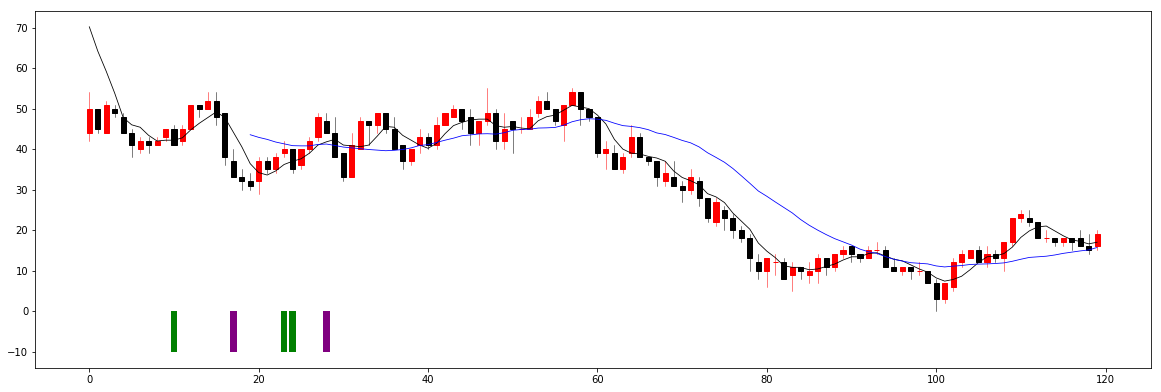

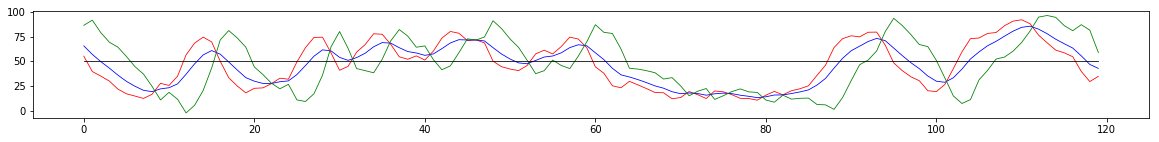

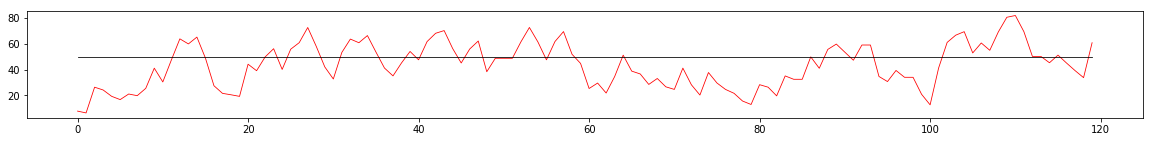

buy 40 [10808]
sell val 41 [1] 10809 [10808]
sell val 42 [-2] 10806 [10808]
sell val 43 [2] 10810 [10808]
sell val 44 [0] 10808 [10808]
sell val 45 [0] 10808 [10808]
sell val 46 [-9] 10799 [10808]
earn 10800 -9.5
buy 51 [10800]
sell val 52 [-2] 10798 [10800]
sell val 53 [-5] 10795 [10800]
earn 10796 -5.5
buy 101 [10828]
sell val 102 [-2] 10826 [10828]
earn 10826 -3.5
2018/9/14 -18.5


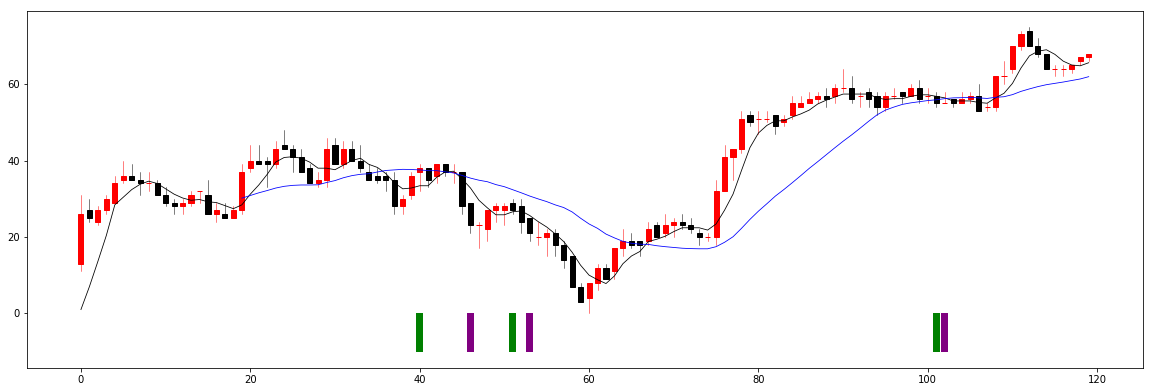

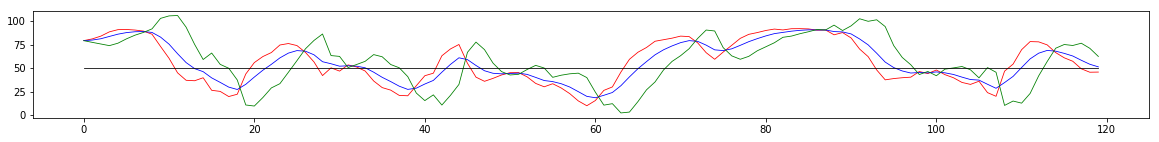

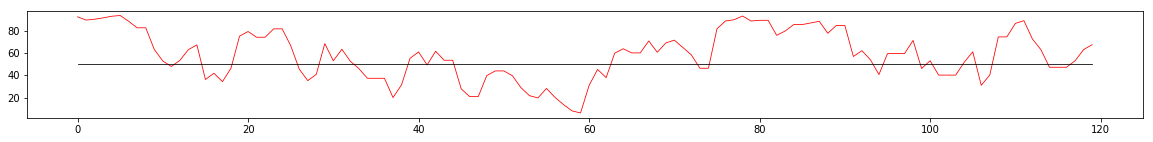

buy 22 [10751]
sell val 23 [-8] 10743 [10751]
earn 10743 -9.5
2018/9/13 -9.5


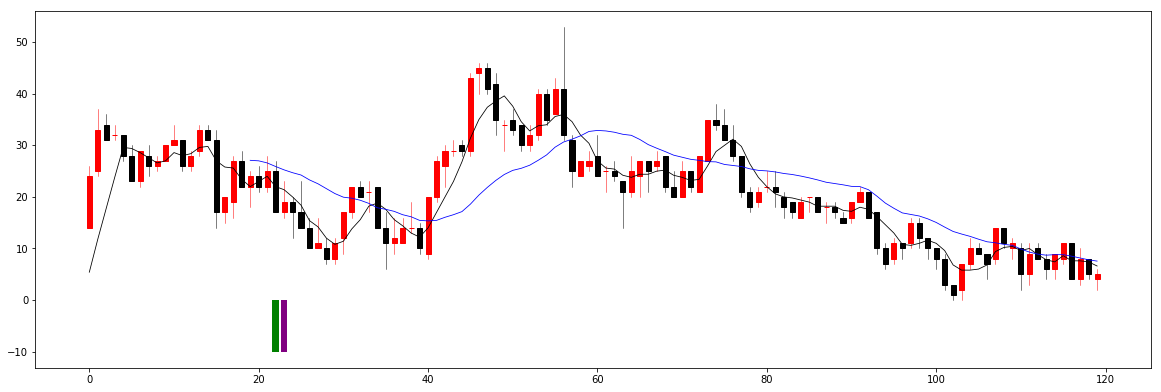

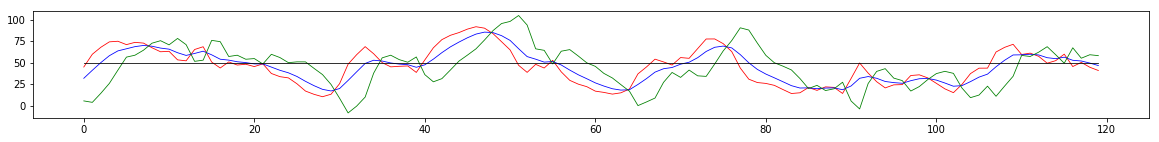

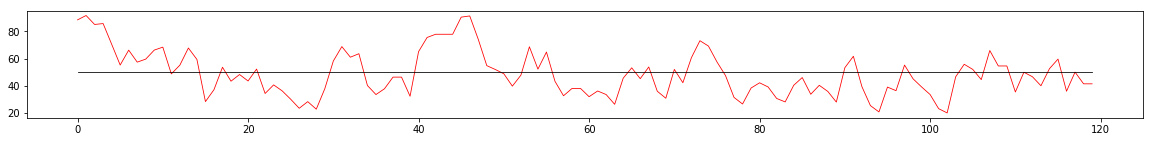

buy 62 [10712]
sell val 63 [2] 10714 [10712]
sell val 64 [0] 10712 [10712]
sell val 65 [-6] 10706 [10712]
sell val 66 [-9] 10703 [10712]
earn 10703 -10.5
buy 87 [10710]
sell val 88 [4] 10714 [10710]
sell val 89 [4] 10714 [10710]
sell val 90 [2] 10712 [10710]
sell val 91 [3] 10713 [10710]
sell val 92 [6] 10716 [10710]
sell val 93 [13] 10723 [10710]
earn 10723 11.5
2018/9/12 1.0


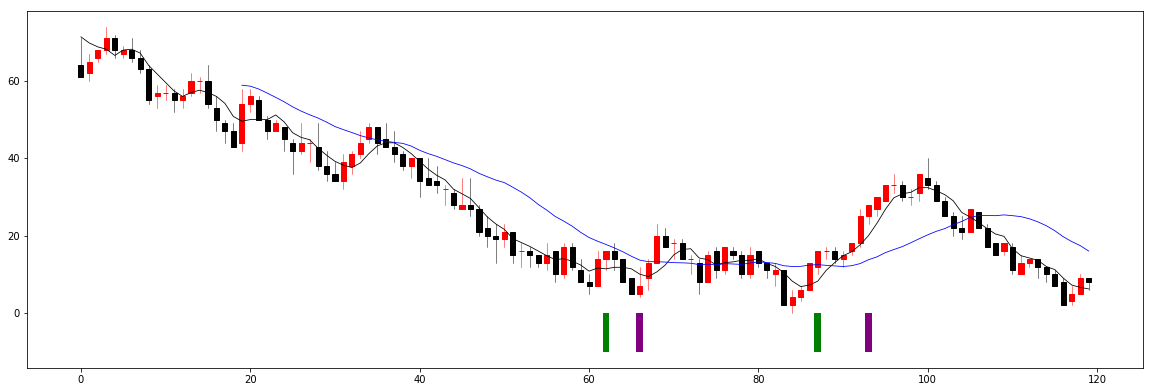

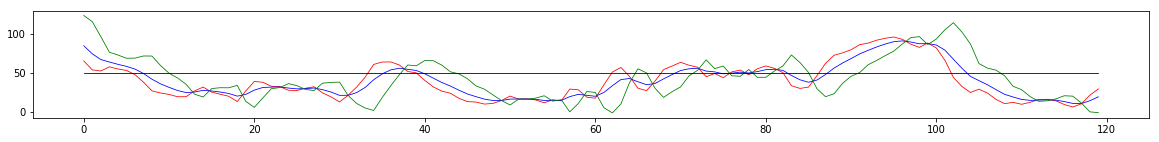

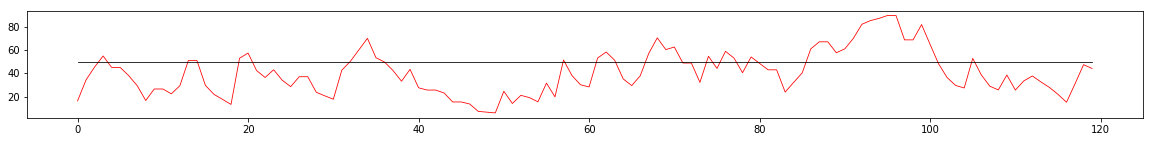

buy 60 [10736]
sell val 61 [-2] 10734 [10736]
sell val 62 [-5] 10731 [10736]
sell val 63 [11] 10747 [10736]
earn 10747 9.5
buy 110 [10699]
sell val 111 [0] 10699 [10699]
sell val 112 [1] 10700 [10699]
sell val 113 [3] 10702 [10699]
sell val 114 [1] 10700 [10699]
sell val 115 [1] 10700 [10699]
sell val 116 [-5] 10694 [10699]
earn 10694 -6.5
2018/9/11 3.0


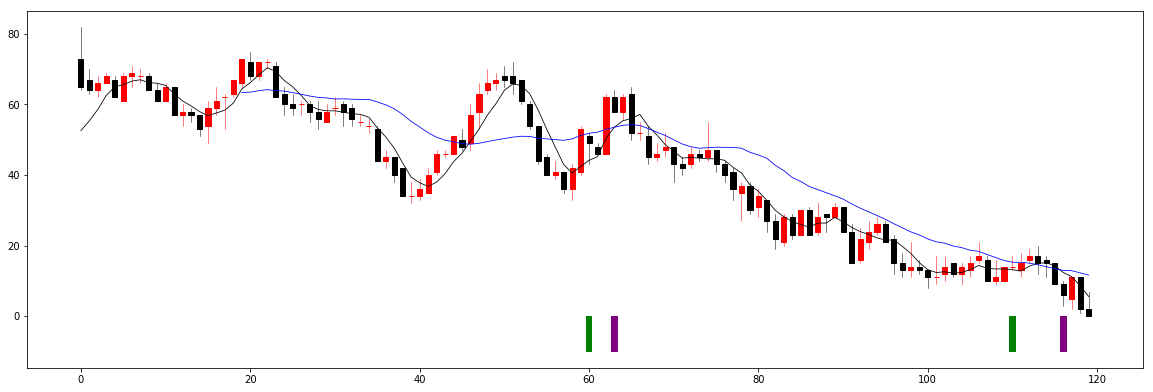

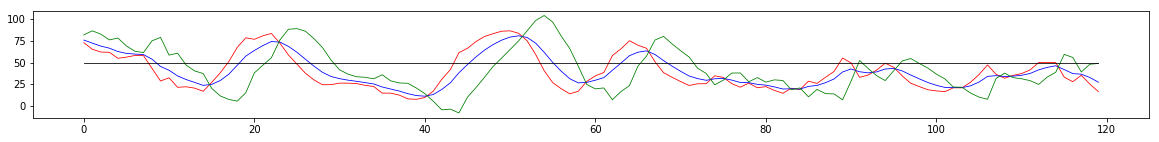

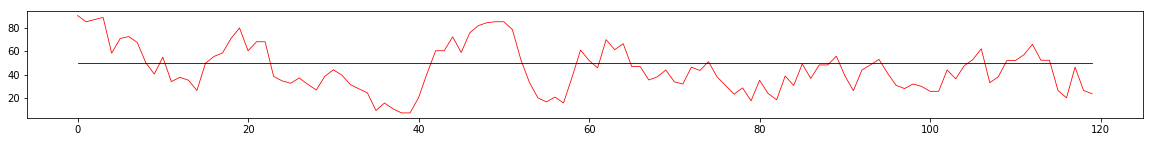

buy 25 [10845]
sell val 26 [-4] 10841 [10845]
sell val 27 [-10] 10835 [10845]
earn 10836 -10.5
buy 54 [10814]
sell val 55 [2] 10816 [10814]
sell val 56 [-8] 10806 [10814]
sell val 57 [-7] 10807 [10814]
sell val 58 [-4] 10810 [10814]
sell val 59 [-7] 10807 [10814]
sell val 60 [-24] 10790 [10814]
earn 10790 -25.5
2018/9/10 -36.0


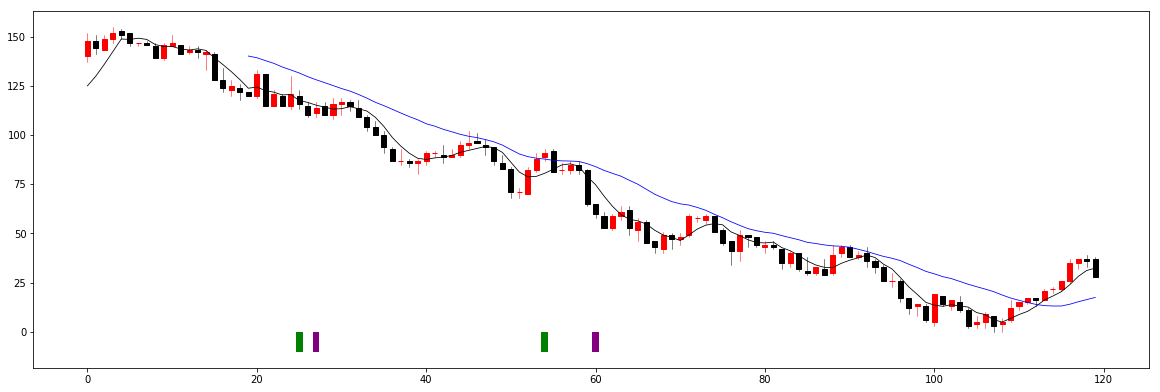

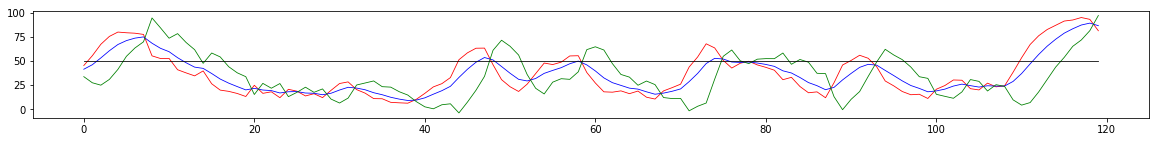

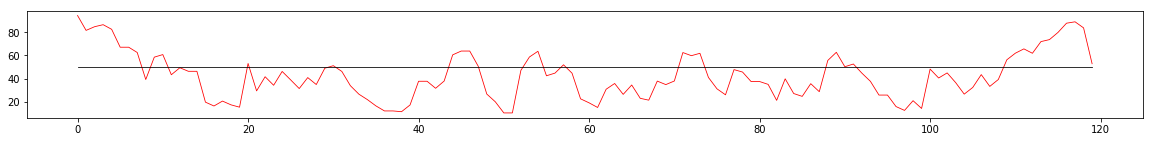

buy 11 [10853]
sell val 12 [0] 10853 [10853]
sell val 13 [2] 10855 [10853]
sell val 14 [8] 10861 [10853]
earn 10861 6.5
buy 27 [10860]
sell val 28 [8] 10868 [10860]
earn 10867 5.5
buy 37 [10849]
sell val 38 [2] 10851 [10849]
sell val 39 [2] 10851 [10849]
sell val 40 [4] 10853 [10849]
sell val 41 [1] 10850 [10849]
sell val 42 [8] 10857 [10849]
earn 10857 6.5
buy 72 [10878]
sell val 73 [5] 10883 [10878]
sell val 74 [4] 10882 [10878]
sell val 75 [8] 10886 [10878]
earn 10886 6.5
buy 97 [10876]
sell val 98 [4] 10880 [10876]
sell val 99 [3] 10879 [10876]
sell val 100 [2] 10878 [10876]
sell val 101 [2] 10878 [10876]
sell val 102 [3] 10879 [10876]
sell val 103 [-4] 10872 [10876]
earn 10871 -6.5
2018/9/7 18.5


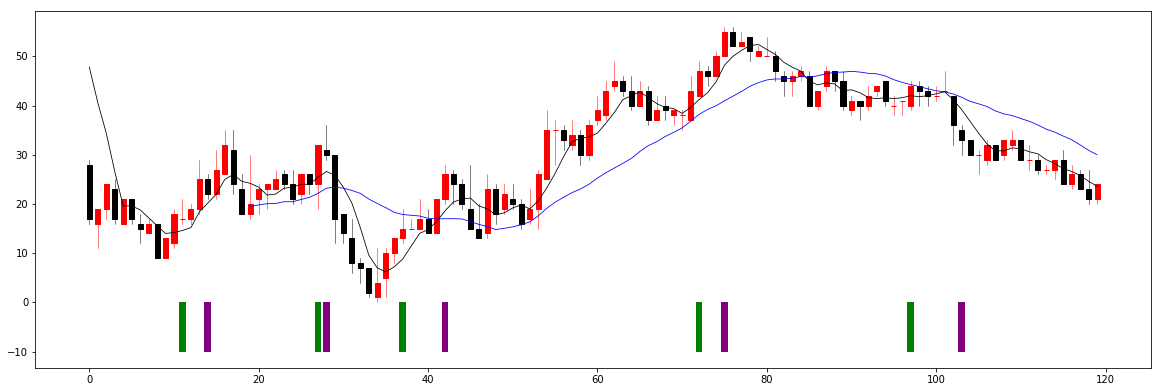

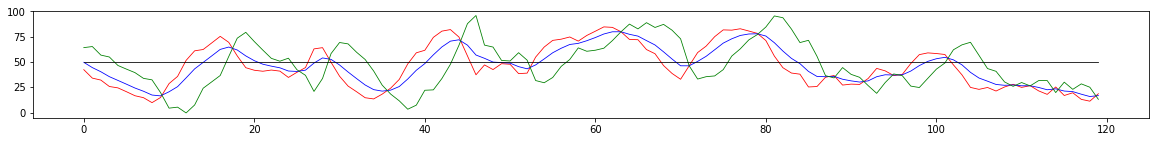

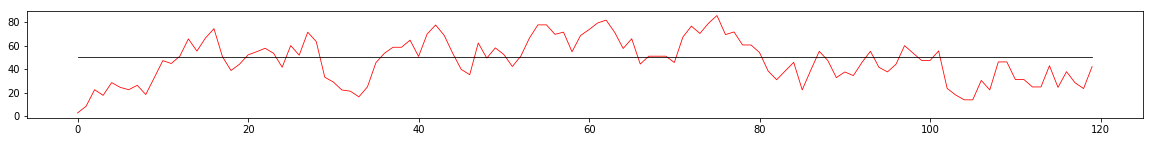

buy 28 [10889]
sell val 29 [-11] 10878 [10889]
earn 10878 -12.5
2018/9/6 -12.5


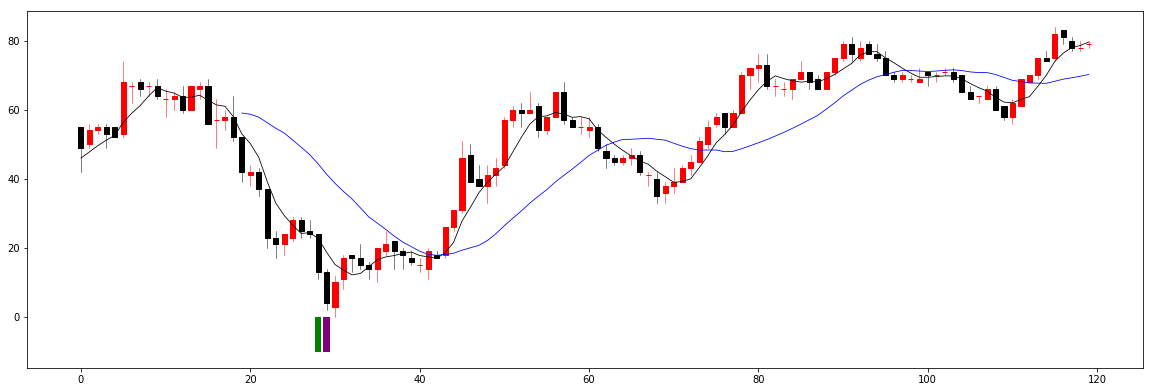

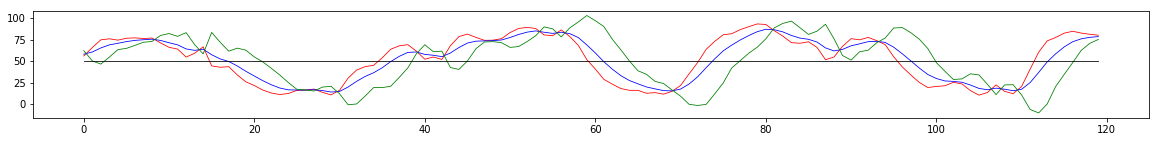

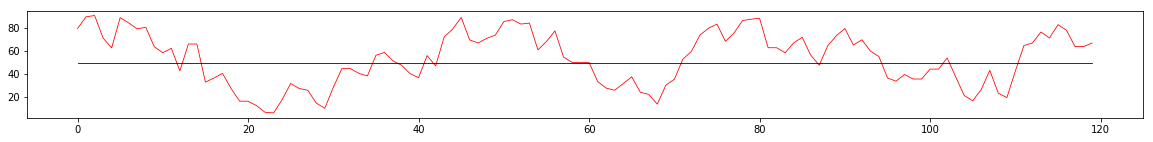

buy 31 [10974]
sell val 32 [2] 10976 [10974]
sell val 33 [3] 10977 [10974]
sell val 34 [8] 10982 [10974]
earn 10982 6.5
buy 59 [11013]
sell val 60 [-7] 11006 [11013]
earn 11007 -7.5
buy 110 [11003]
sell val 111 [-2] 11001 [11003]
sell val 112 [-9] 10994 [11003]
earn 10994 -10.5
2018/9/5 -11.5


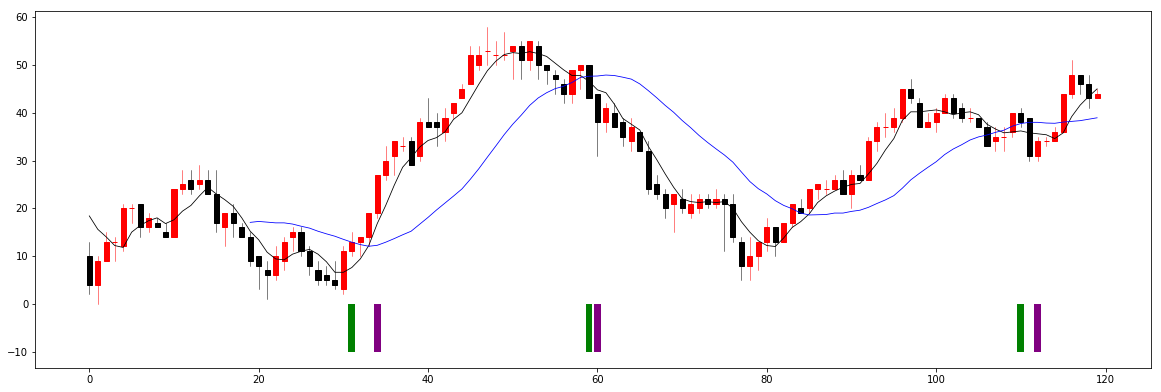

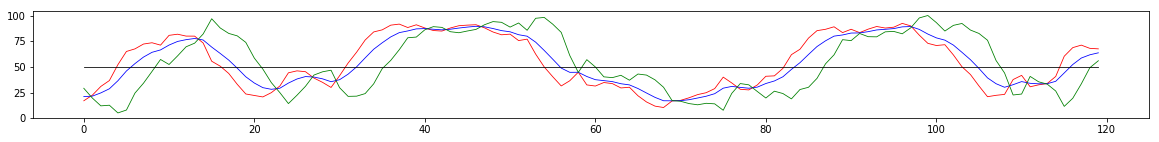

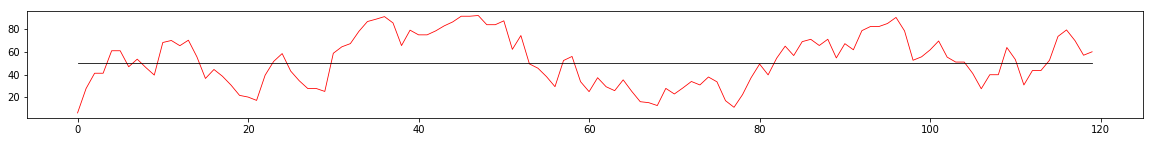

buy 81 [10978]
sell val 82 [0] 10978 [10978]
sell val 83 [2] 10980 [10978]
sell val 84 [4] 10982 [10978]
sell val 85 [-4] 10974 [10978]
sell val 86 [-12] 10966 [10978]
earn 10966 -13.5
2018/9/4 -13.5


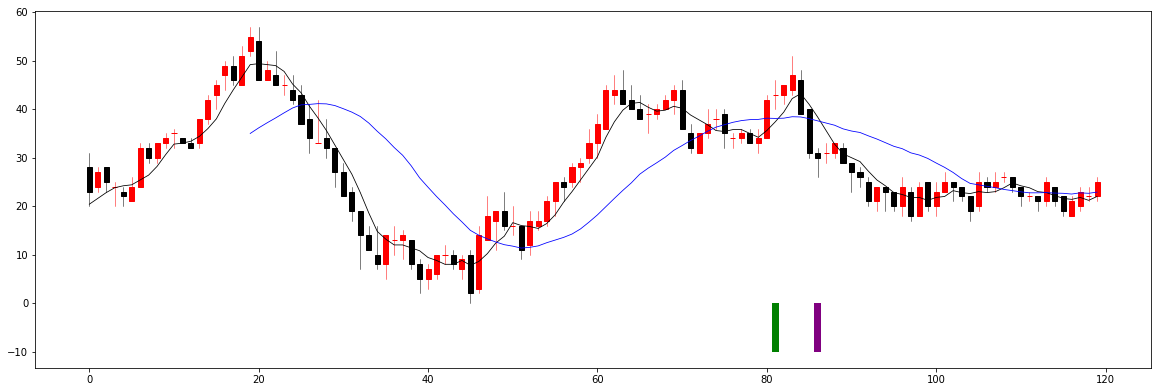

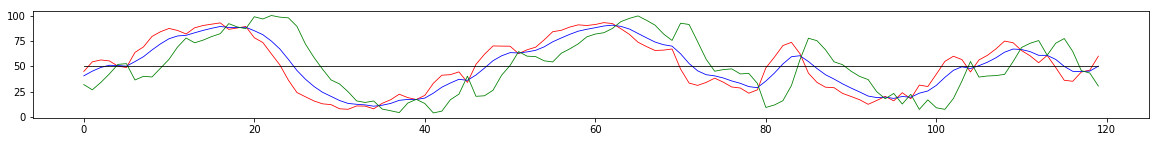

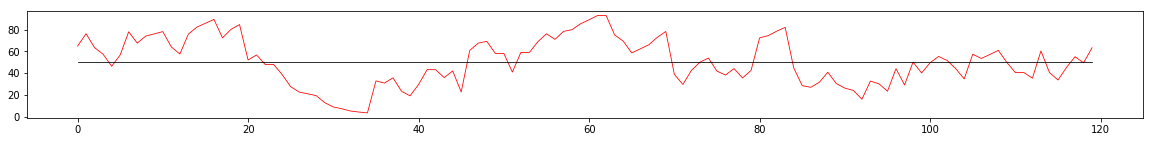

buy 62 [11004]
sell val 63 [-1] 11003 [11004]
sell val 64 [-3] 11001 [11004]
sell val 65 [-6] 10998 [11004]
sell val 66 [-8] 10996 [11004]
earn 10996 -9.5
buy 98 [10976]
sell val 99 [-1] 10975 [10976]
sell val 100 [-1] 10975 [10976]
sell val 101 [-4] 10972 [10976]
sell val 102 [-6] 10970 [10976]
earn 10970 -7.5
2018/9/3 -17.0


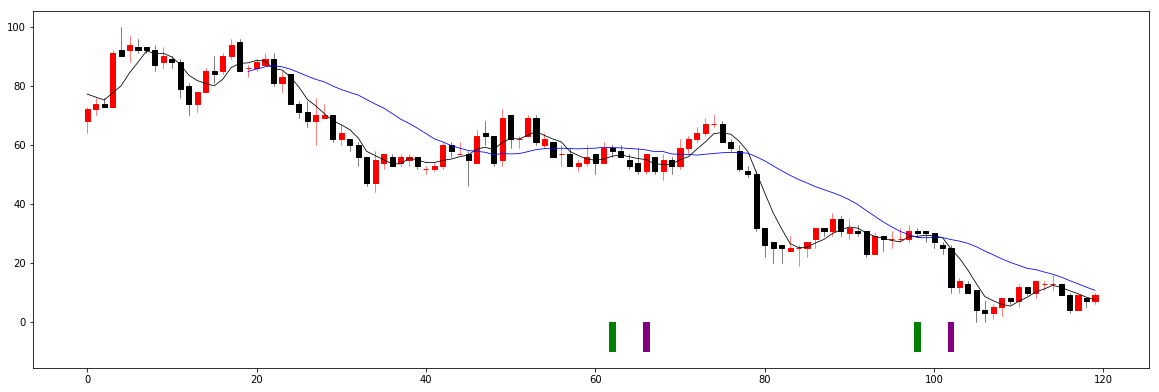

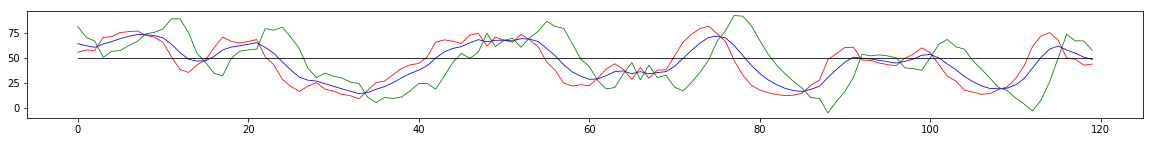

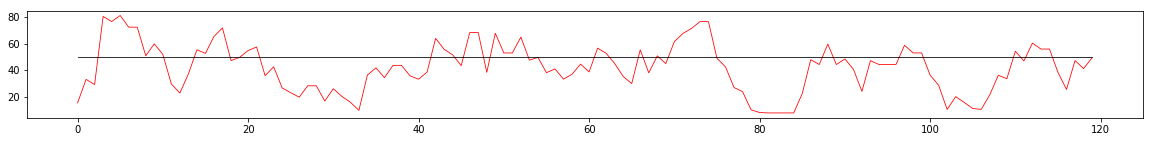

buy 19 [10993]
sell val 20 [9] 11002 [10993]
earn 11003 8.5
buy 29 [10993]
sell val 30 [-6] 10987 [10993]
sell val 31 [-4] 10989 [10993]
sell val 32 [0] 10993 [10993]
sell val 33 [-6] 10987 [10993]
sell val 34 [-3] 10990 [10993]
sell val 35 [-2] 10991 [10993]
sell val 36 [-6] 10987 [10993]
earn 10987 -7.5
buy 45 [10975]
sell val 46 [5] 10980 [10975]
sell val 47 [7] 10982 [10975]
sell val 48 [10] 10985 [10975]
earn 10985 8.5
buy 92 [10975]
sell val 93 [-3] 10972 [10975]
earn 10972 -4.5
2018/8/31 5.0


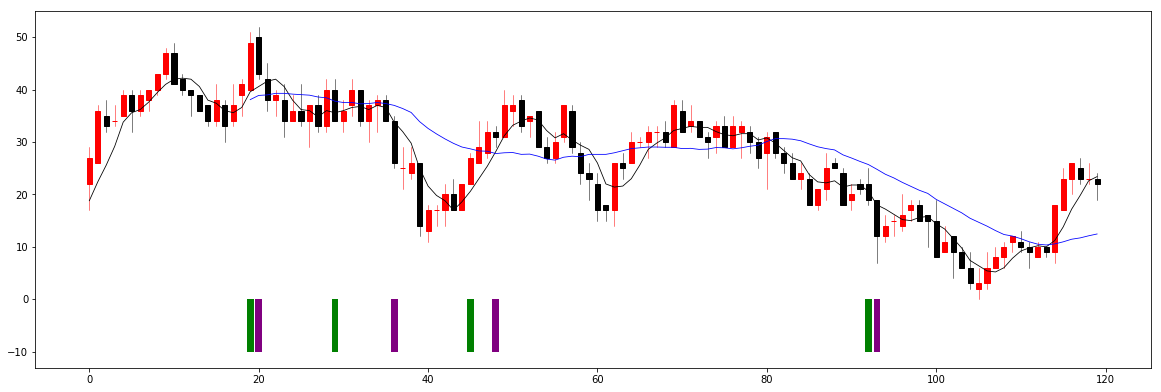

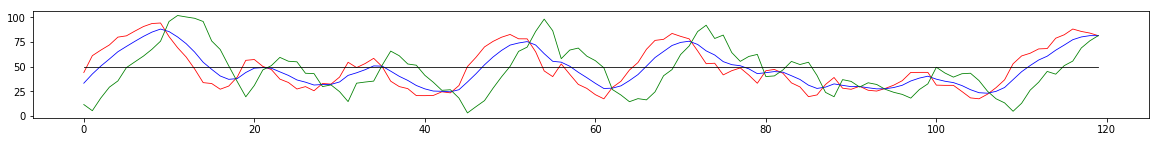

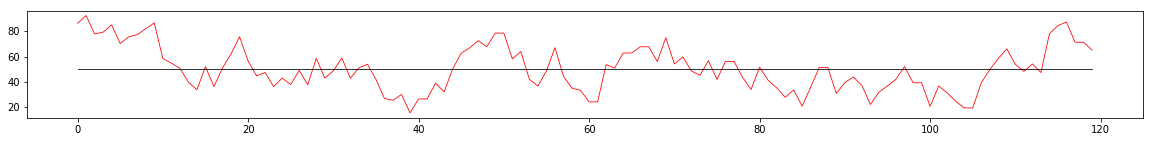

buy 107 [11055]
sell val 108 [4] 11059 [11055]
sell val 109 [-1] 11054 [11055]
sell val 110 [-5] 11050 [11055]
sell val 111 [-1] 11054 [11055]
sell val 112 [1] 11056 [11055]
sell val 113 [1] 11056 [11055]
sell val 114 [6] 11061 [11055]
sell val 115 [6] 11061 [11055]
sell val 116 [7] 11062 [11055]
sell val 117 [7] 11062 [11055]
sell val 118 [9] 11064 [11055]
earn 11065 8.5
2018/8/30 8.5


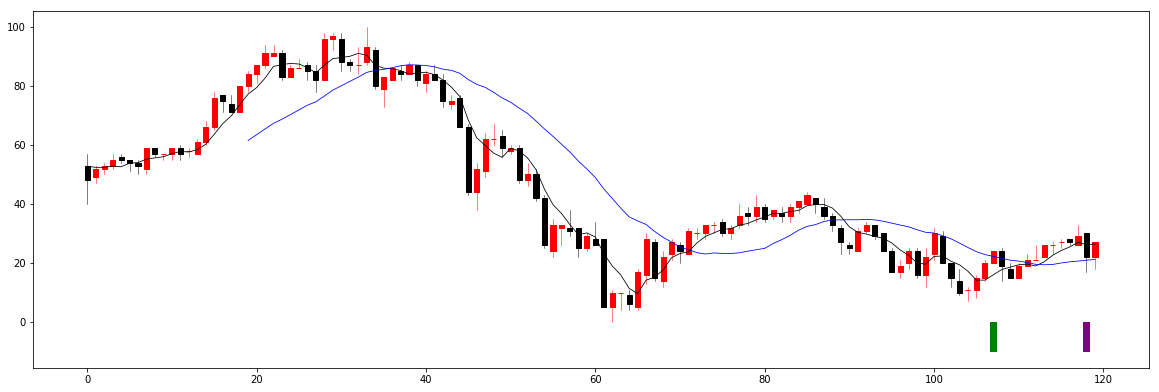

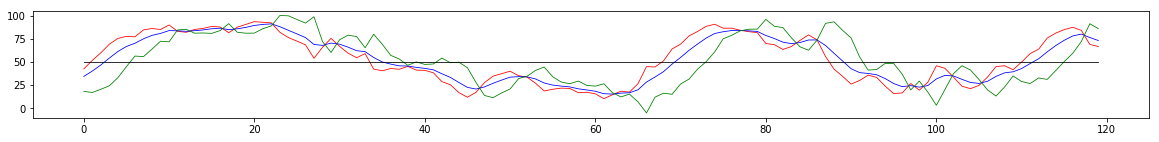

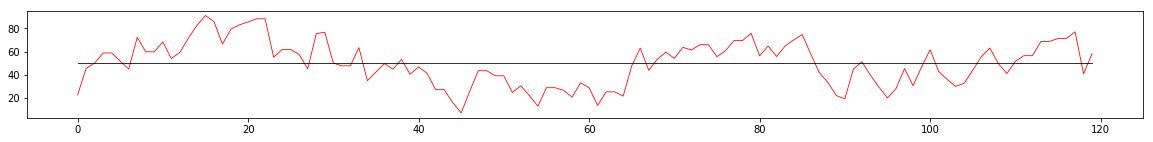

buy 38 [10996]
sell val 39 [-2] 10994 [10996]
sell val 40 [-2] 10994 [10996]
sell val 41 [-2] 10994 [10996]
sell val 42 [-5] 10991 [10996]
sell val 43 [-5] 10991 [10996]
sell val 44 [2] 10998 [10996]
sell val 45 [1] 10997 [10996]
sell val 46 [-3] 10993 [10996]
sell val 47 [-3] 10993 [10996]
sell val 48 [4] 11000 [10996]
sell val 49 [2] 10998 [10996]
sell val 50 [3] 10999 [10996]
sell val 51 [8] 11004 [10996]
earn 11004 6.5
buy 88 [11020]
sell val 89 [1] 11021 [11020]
sell val 90 [-4] 11016 [11020]
earn 11016 -5.5
buy 91 [11018]
sell val 92 [1] 11019 [11018]
sell val 93 [0] 11018 [11018]
sell val 94 [-1] 11017 [11018]
earn 11017 -2.5
buy 95 [11020]
sell val 96 [1] 11021 [11020]
sell val 97 [2] 11022 [11020]
sell val 98 [0] 11020 [11020]
sell val 99 [0] 11020 [11020]
sell val 100 [3] 11023 [11020]
sell val 101 [5] 11025 [11020]
sell val 102 [8] 11028 [11020]
earn 11029 7.5
2018/8/29 6.0


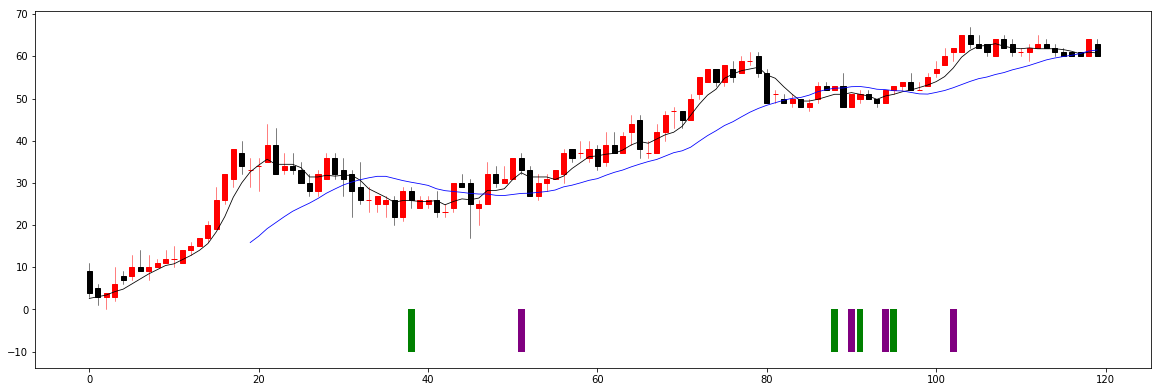

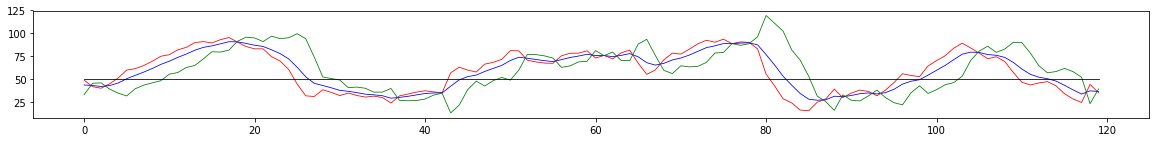

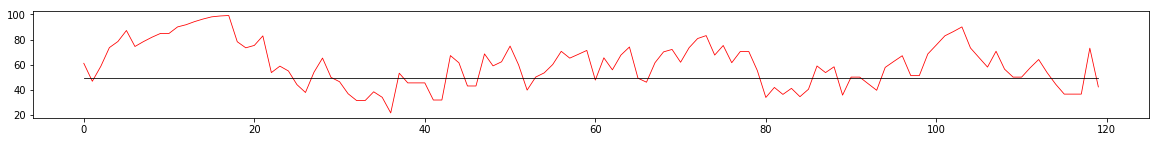

buy 37 [10949]
sell val 38 [-5] 10944 [10949]
earn 10943 -7.5
buy 49 [10948]
sell val 50 [7] 10955 [10948]
sell val 51 [12] 10960 [10948]
earn 10960 10.5
buy 60 [10954]
sell val 61 [-8] 10946 [10954]
earn 10946 -9.5
buy 64 [10951]
sell val 65 [-2] 10949 [10951]
earn 10949 -3.5
buy 66 [10953]
sell val 67 [4] 10957 [10953]
sell val 68 [4] 10957 [10953]
sell val 69 [2] 10955 [10953]
sell val 70 [5] 10958 [10953]
sell val 71 [4] 10957 [10953]
sell val 72 [-4] 10949 [10953]
earn 10950 -4.5
2018/8/28 -14.5


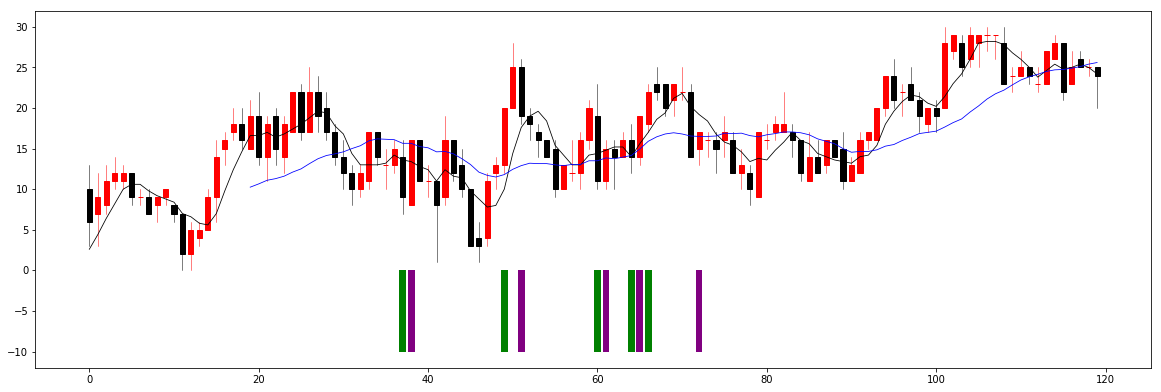

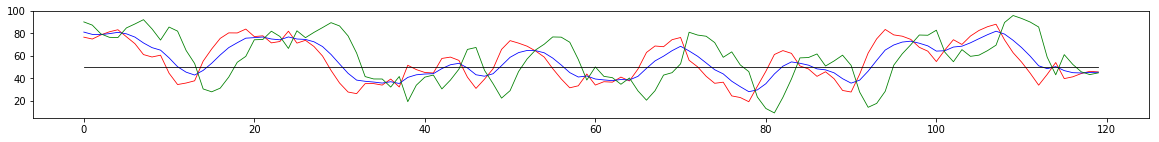

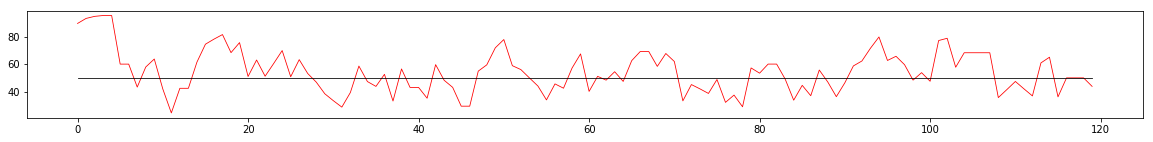

buy 23 [10853]
sell val 24 [-7] 10846 [10853]
sell val 25 [1] 10854 [10853]
sell val 26 [0] 10853 [10853]
sell val 27 [7] 10860 [10853]
sell val 28 [-3] 10850 [10853]
sell val 29 [-9] 10844 [10853]
earn 10844 -10.5
buy 33 [10852]
sell val 34 [-2] 10850 [10852]
sell val 35 [-1] 10851 [10852]
sell val 36 [-8] 10844 [10852]
earn 10843 -10.5
buy 42 [10849]
sell val 43 [-5] 10844 [10849]
sell val 44 [-1] 10848 [10849]
sell val 45 [-7] 10842 [10849]
sell val 46 [-1] 10848 [10849]
sell val 47 [-5] 10844 [10849]
sell val 48 [-2] 10847 [10849]
sell val 49 [-4] 10845 [10849]
sell val 50 [-5] 10844 [10849]
earn 10844 -6.5
buy 71 [10860]
sell val 72 [-6] 10854 [10860]
earn 10854 -7.5
2018/8/27 -35.0


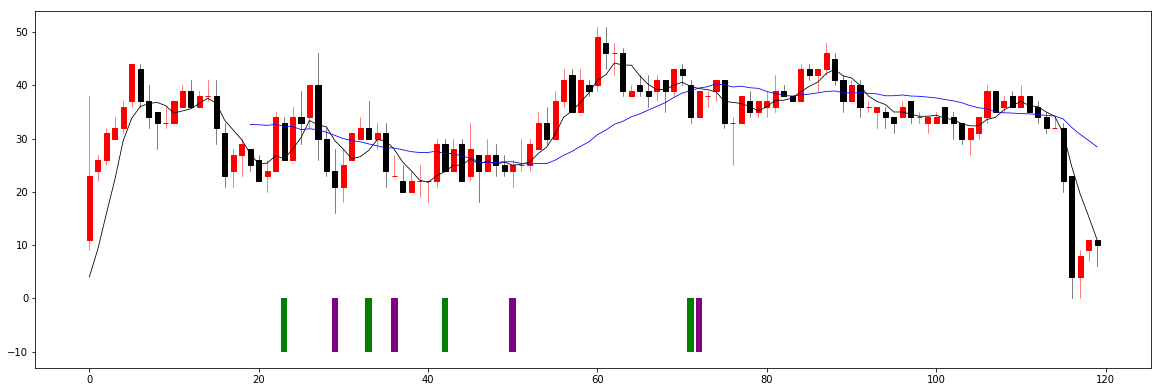

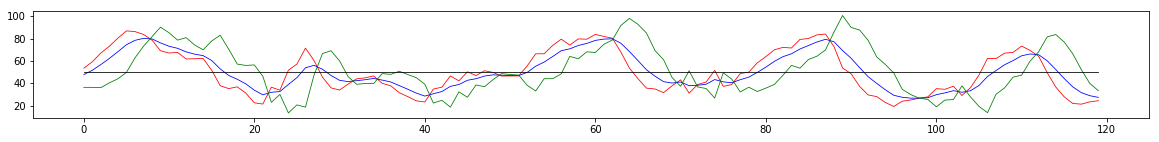

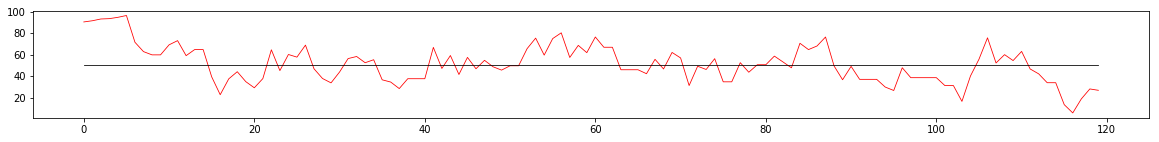

buy 87 [10751]
sell val 88 [9] 10760 [10751]
earn 10760 7.5
buy 108 [10764]
sell val 109 [0] 10764 [10764]
sell val 110 [12] 10776 [10764]
earn 10777 11.5
2018/8/24 19.0


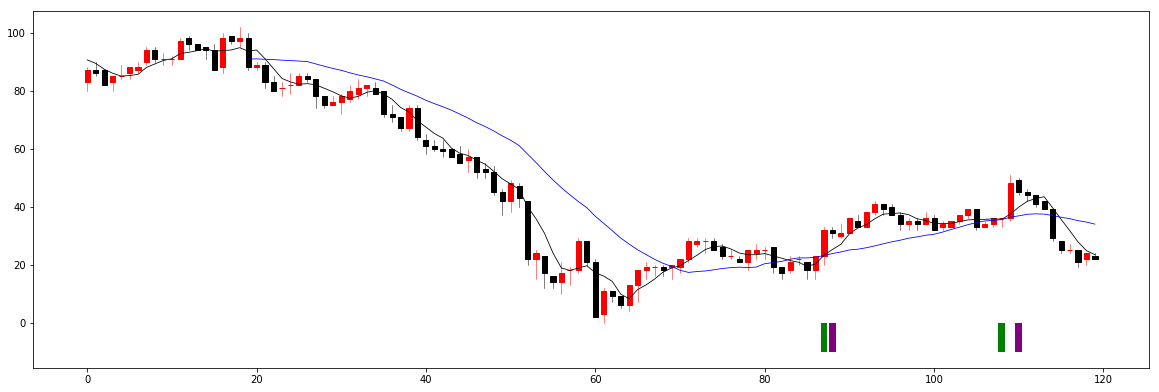

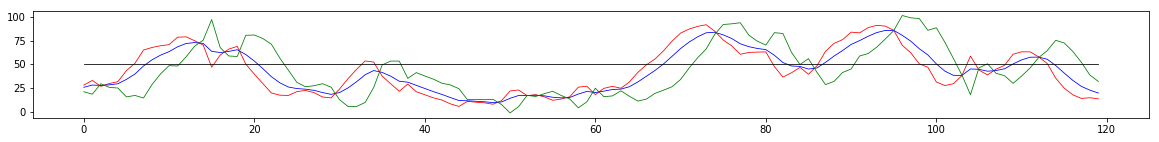

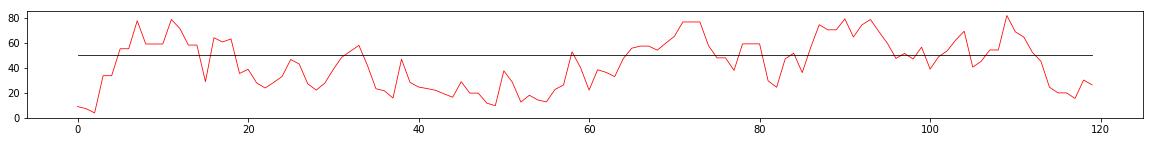

2018/8/23 0


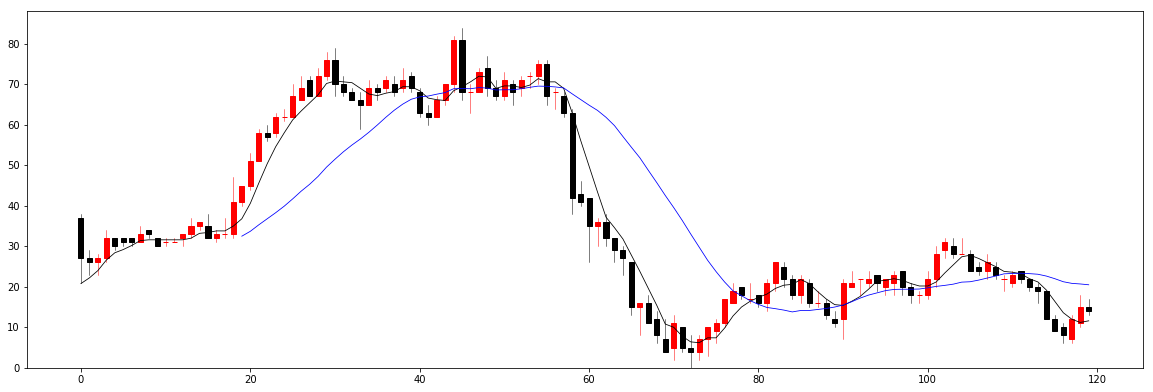

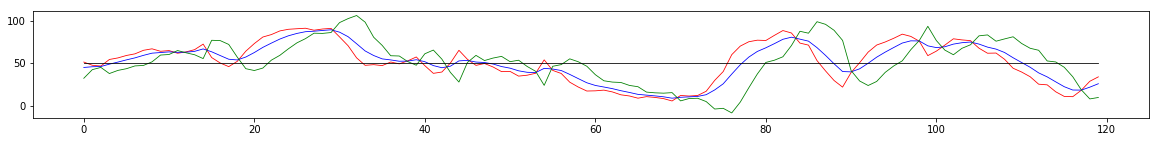

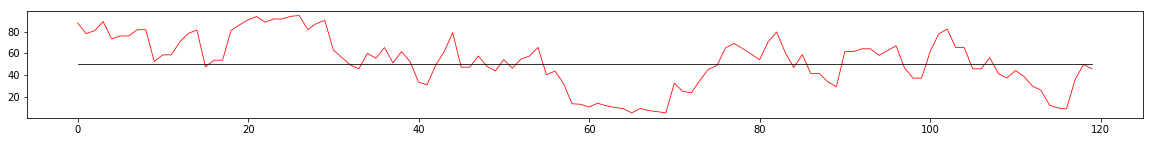

buy 34 [10783]
sell val 35 [2] 10785 [10783]
sell val 36 [-2] 10781 [10783]
sell val 37 [-5] 10778 [10783]
earn 10779 -5.5
buy 53 [10763]
sell val 54 [0] 10763 [10763]
sell val 55 [2] 10765 [10763]
sell val 56 [-4] 10759 [10763]
sell val 57 [4] 10767 [10763]
sell val 58 [4] 10767 [10763]
sell val 59 [-1] 10762 [10763]
sell val 60 [-15] 10748 [10763]
earn 10749 -15.5
buy 69 [10742]
sell val 70 [-2] 10740 [10742]
sell val 71 [2] 10744 [10742]
sell val 72 [1] 10743 [10742]
sell val 73 [3] 10745 [10742]
sell val 74 [6] 10748 [10742]
sell val 75 [7] 10749 [10742]
sell val 76 [10] 10752 [10742]
earn 10753 9.5
2018/8/22 -11.5


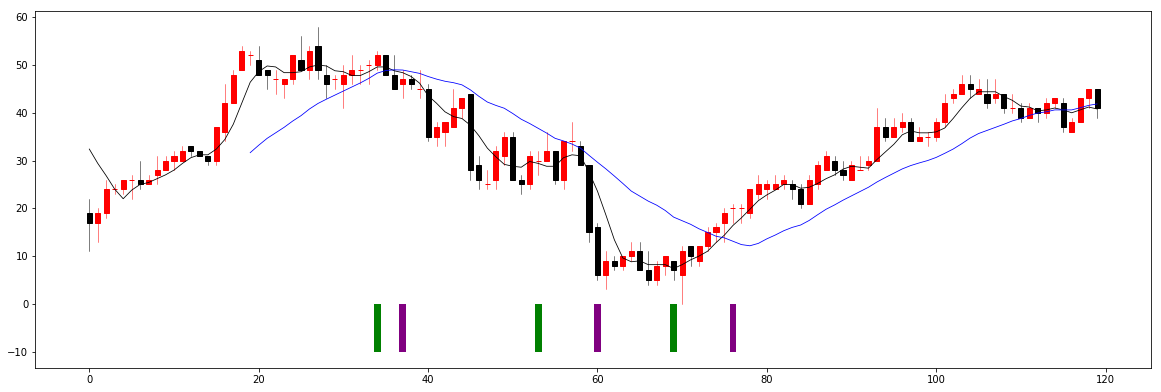

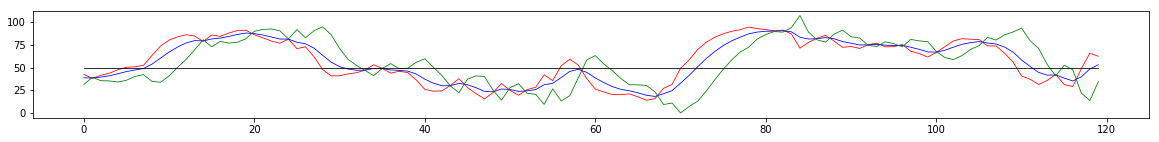

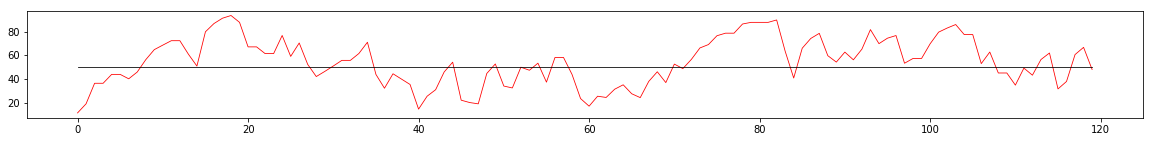

buy 22 [10693]
sell val 23 [6] 10699 [10693]
sell val 24 [12] 10705 [10693]
earn 10705 10.5
buy 58 [10699]
sell val 59 [-3] 10696 [10699]
sell val 60 [3] 10702 [10699]
sell val 61 [-1] 10698 [10699]
sell val 62 [0] 10699 [10699]
sell val 63 [13] 10712 [10699]
earn 10711 10.5
2018/8/21 21.0


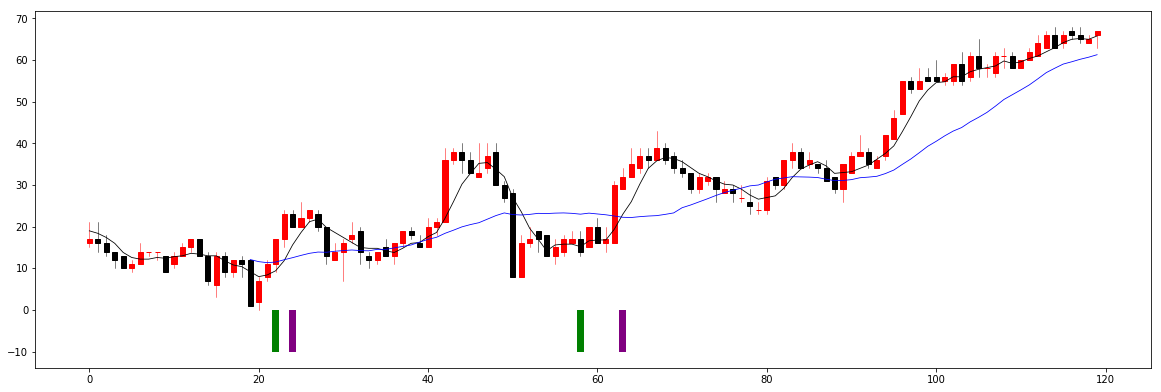

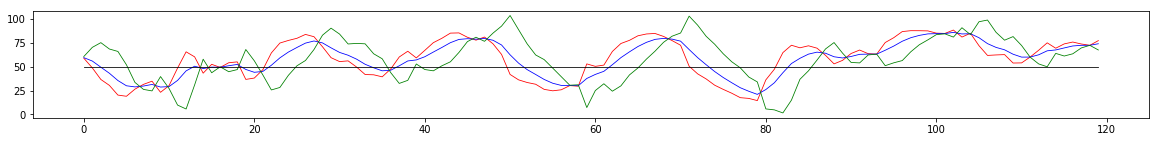

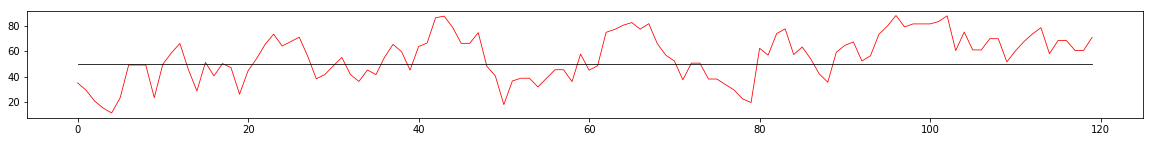

buy 8 [10689]
sell val 9 [-1] 10688 [10689]
sell val 10 [2] 10691 [10689]
sell val 11 [1] 10690 [10689]
sell val 12 [-3] 10686 [10689]
earn 10686 -4.5
buy 27 [10677]
sell val 28 [-1] 10676 [10677]
sell val 29 [5] 10682 [10677]
sell val 30 [4] 10681 [10677]
sell val 31 [5] 10682 [10677]
sell val 32 [6] 10683 [10677]
sell val 33 [8] 10685 [10677]
earn 10685 6.5
buy 44 [10673]
sell val 45 [4] 10677 [10673]
sell val 46 [3] 10676 [10673]
sell val 47 [2] 10675 [10673]
sell val 48 [-10] 10663 [10673]
earn 10663 -11.5
buy 53 [10671]
sell val 54 [-4] 10667 [10671]
sell val 55 [3] 10674 [10671]
sell val 56 [7] 10678 [10671]
sell val 57 [7] 10678 [10671]
sell val 58 [15] 10686 [10671]
earn 10686 13.5
2018/8/20 4.0


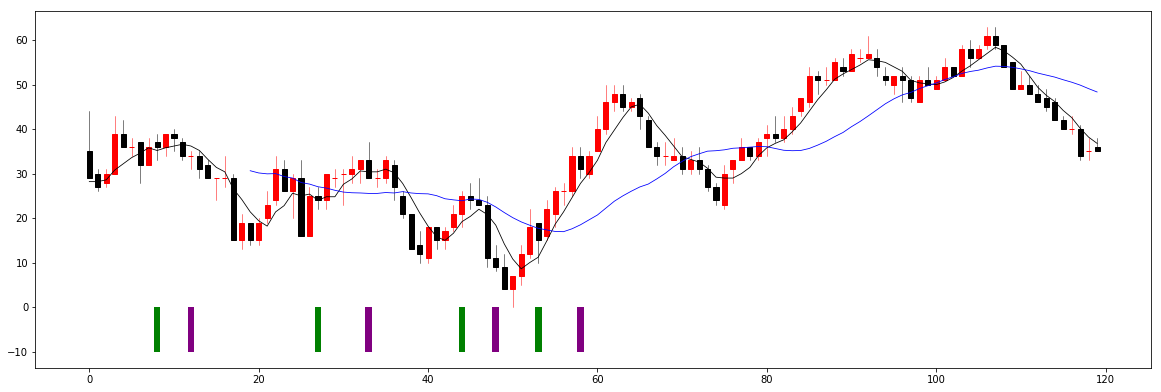

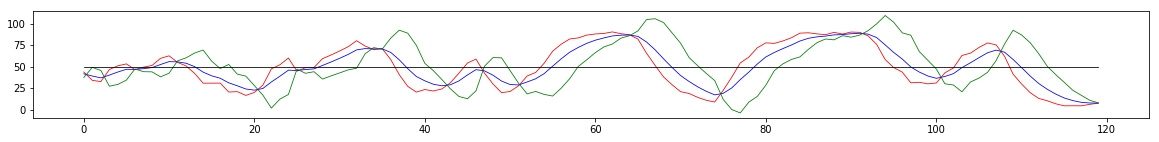

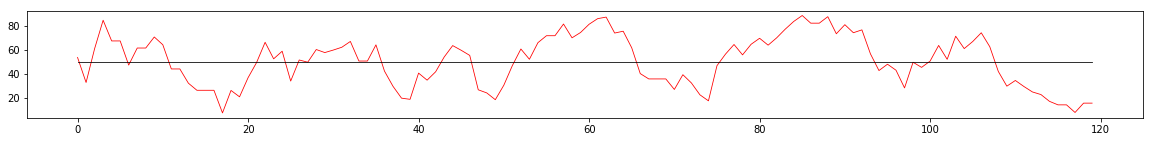

buy 27 [10716]
sell val 28 [-6] 10710 [10716]
sell val 29 [1] 10717 [10716]
sell val 30 [1] 10717 [10716]
sell val 31 [-4] 10712 [10716]
sell val 32 [-7] 10709 [10716]
earn 10708 -9.5
2018/8/17 -9.5


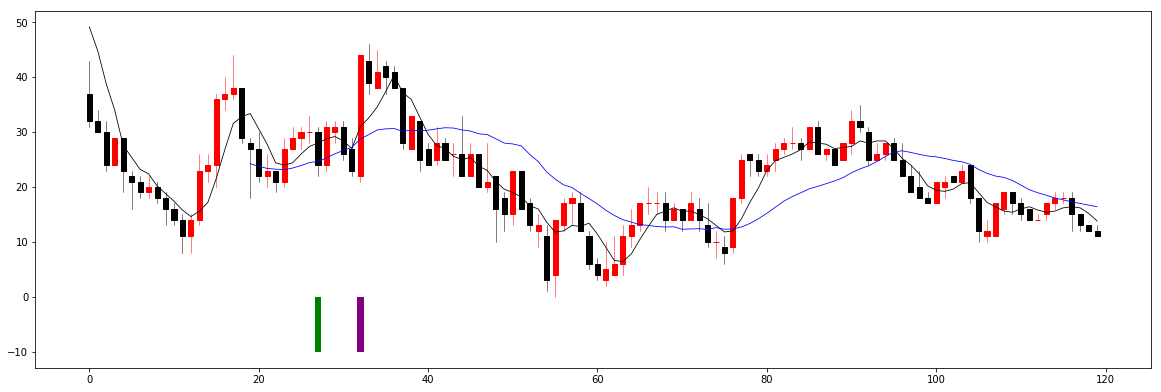

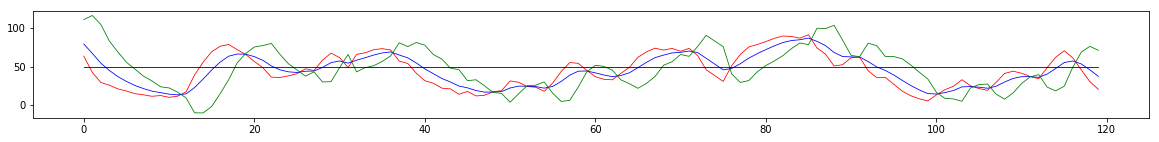

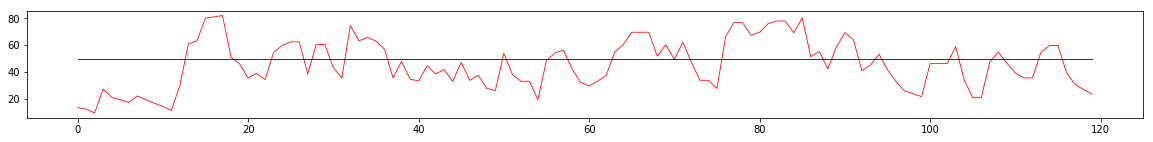

buy 23 [10606]
sell val 24 [9] 10615 [10606]
earn 10614 6.5
buy 74 [10666]
sell val 75 [3] 10669 [10666]
sell val 76 [6] 10672 [10666]
sell val 77 [16] 10682 [10666]
earn 10682 14.5
buy 101 [10710]
sell val 102 [-3] 10707 [10710]
sell val 103 [-7] 10703 [10710]
earn 10704 -7.5
2018/8/16 13.5


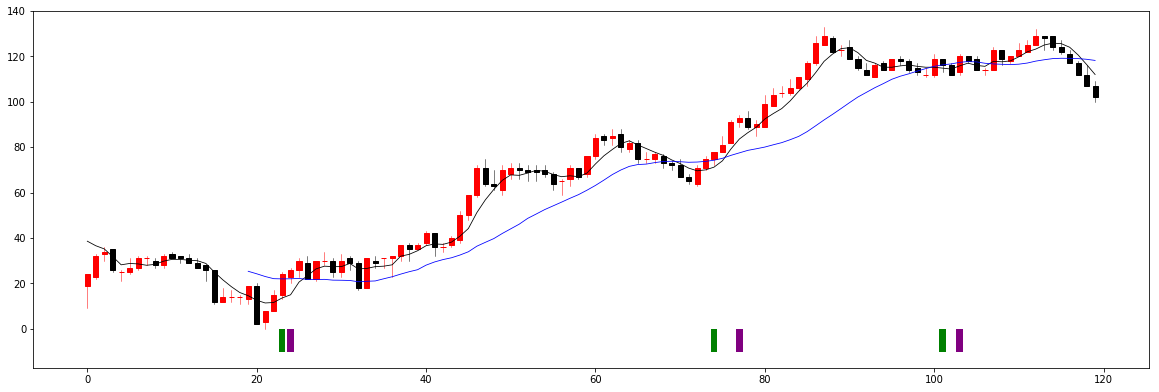

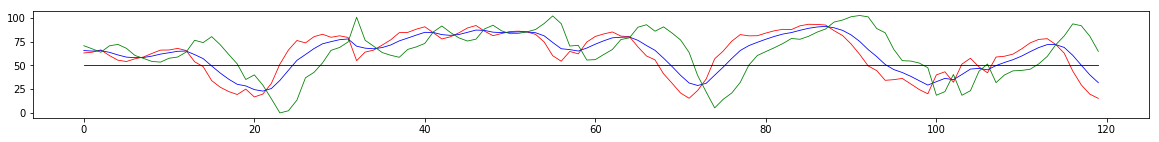

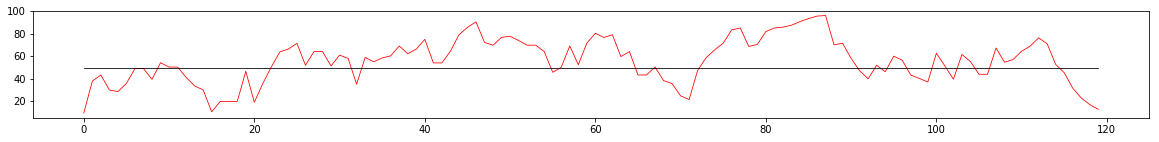

buy 32 [10786]
sell val 33 [-2] 10784 [10786]
sell val 34 [5] 10791 [10786]
sell val 35 [6] 10792 [10786]
sell val 36 [4] 10790 [10786]
sell val 37 [5] 10791 [10786]
sell val 38 [7] 10793 [10786]
sell val 39 [5] 10791 [10786]
sell val 40 [-12] 10774 [10786]
earn 10775 -12.5
buy 49 [10766]
sell val 50 [-5] 10761 [10766]
earn 10761 -6.5
buy 73 [10767]
sell val 74 [-2] 10765 [10767]
sell val 75 [0] 10767 [10767]
sell val 76 [-2] 10765 [10767]
sell val 77 [-3] 10764 [10767]
sell val 78 [-5] 10762 [10767]
sell val 79 [-5] 10762 [10767]
sell val 80 [-7] 10760 [10767]
earn 10759 -9.5
buy 114 [10727]
sell val 115 [0] 10727 [10727]
sell val 116 [-5] 10722 [10727]
sell val 117 [-5] 10722 [10727]
sell val 118 [-9] 10718 [10727]
earn 10717 -11.5
2018/8/15 -40.0


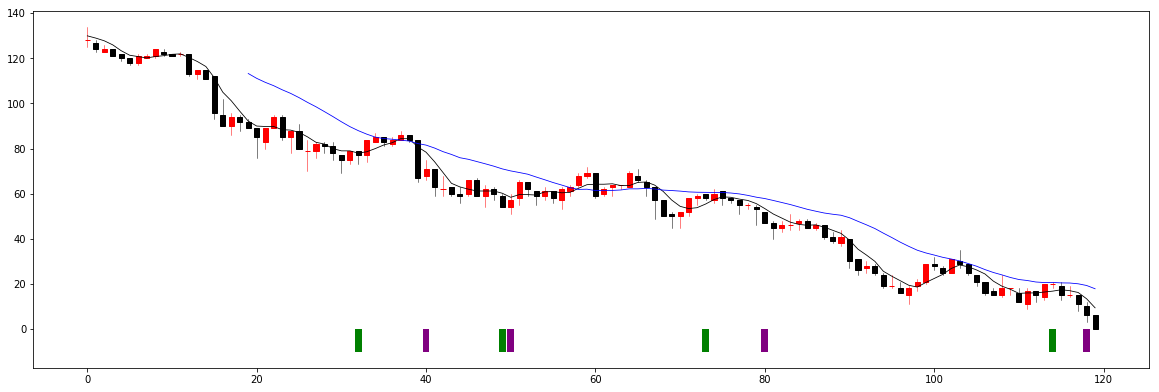

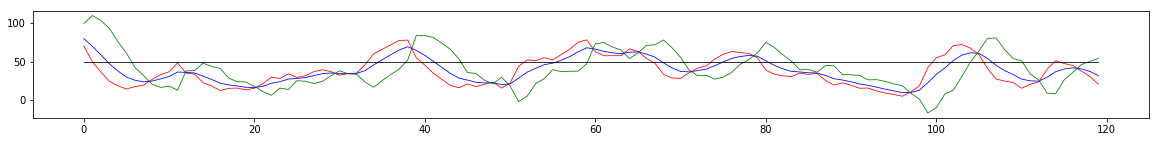

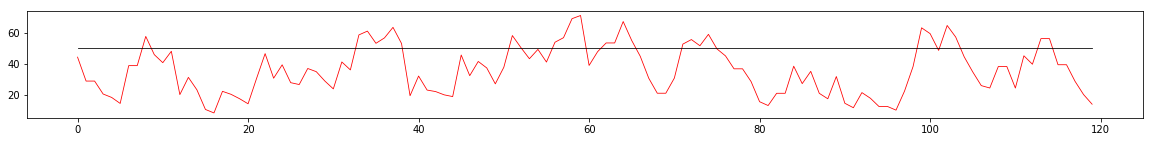

buy 42 [10788]
sell val 43 [-8] 10780 [10788]
earn 10780 -9.5
buy 59 [10779]
sell val 60 [-3] 10776 [10779]
sell val 61 [-6] 10773 [10779]
sell val 62 [-1] 10778 [10779]
sell val 63 [11] 10790 [10779]
earn 10790 9.5
buy 82 [10786]
sell val 83 [0] 10786 [10786]
sell val 84 [-4] 10782 [10786]
sell val 85 [-7] 10779 [10786]
sell val 86 [-7] 10779 [10786]
earn 10779 -8.5
2018/8/14 -8.5


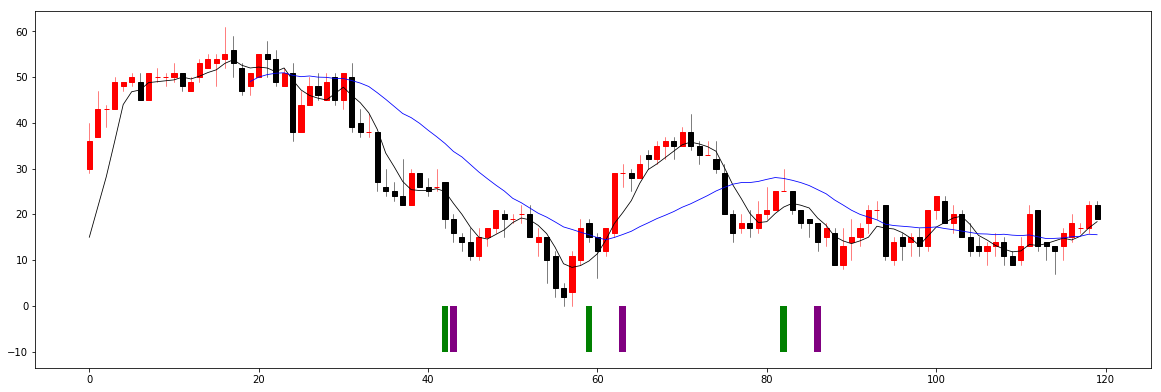

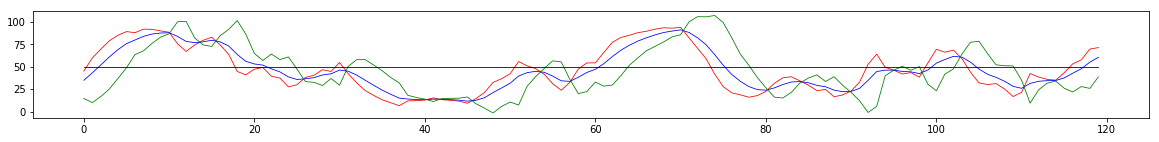

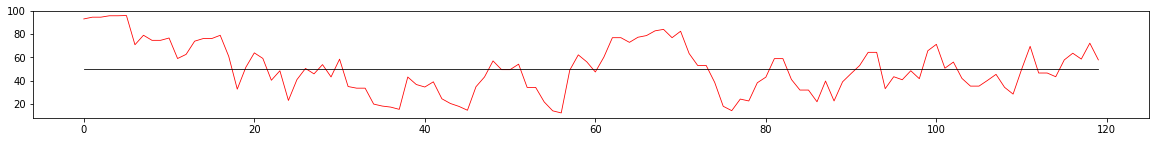

buy 34 [10860]
sell val 35 [-2] 10858 [10860]
sell val 36 [0] 10860 [10860]
sell val 37 [0] 10860 [10860]
sell val 38 [2] 10862 [10860]
sell val 39 [6] 10866 [10860]
sell val 40 [7] 10867 [10860]
sell val 41 [3] 10863 [10860]
sell val 42 [9] 10869 [10860]
earn 10869 7.5
buy 64 [10871]
sell val 65 [-5] 10866 [10871]
sell val 66 [-6] 10865 [10871]
sell val 67 [-7] 10864 [10871]
sell val 68 [-5] 10866 [10871]
sell val 69 [-6] 10865 [10871]
sell val 70 [-27] 10844 [10871]
earn 10844 -28.5
buy 84 [10839]
sell val 85 [0] 10839 [10839]
sell val 86 [3] 10842 [10839]
sell val 87 [5] 10844 [10839]
sell val 88 [2] 10841 [10839]
sell val 89 [2] 10841 [10839]
sell val 90 [5] 10844 [10839]
sell val 91 [8] 10847 [10839]
earn 10846 5.5
2018/8/13 -15.5


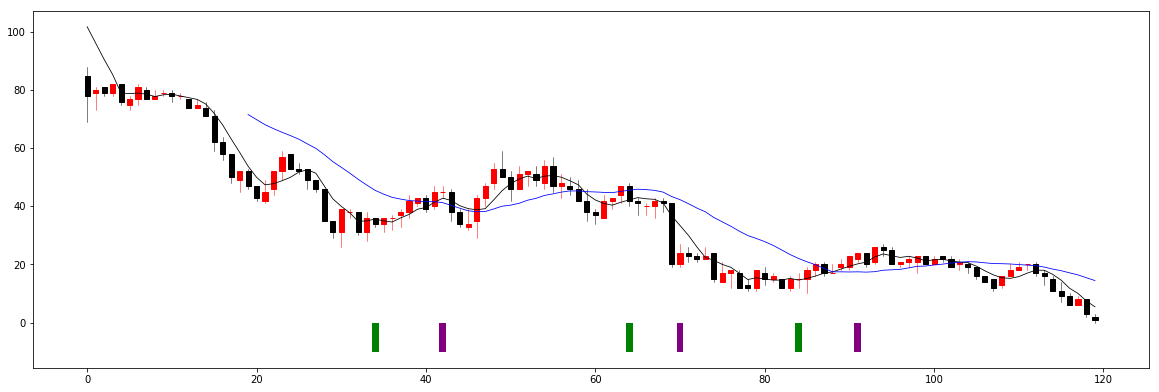

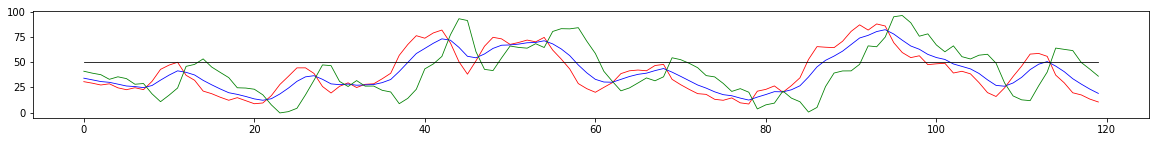

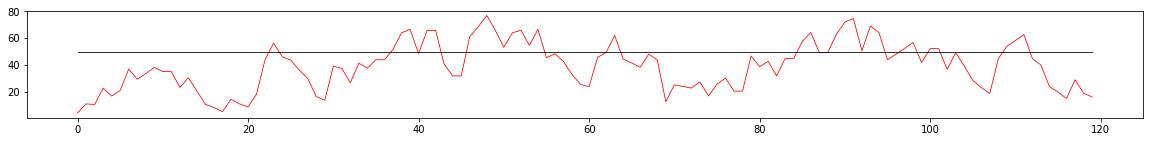

buy 107 [11002]
sell val 108 [1] 11003 [11002]
sell val 109 [-6] 10996 [11002]
earn 10997 -6.5
2018/8/10 -6.5


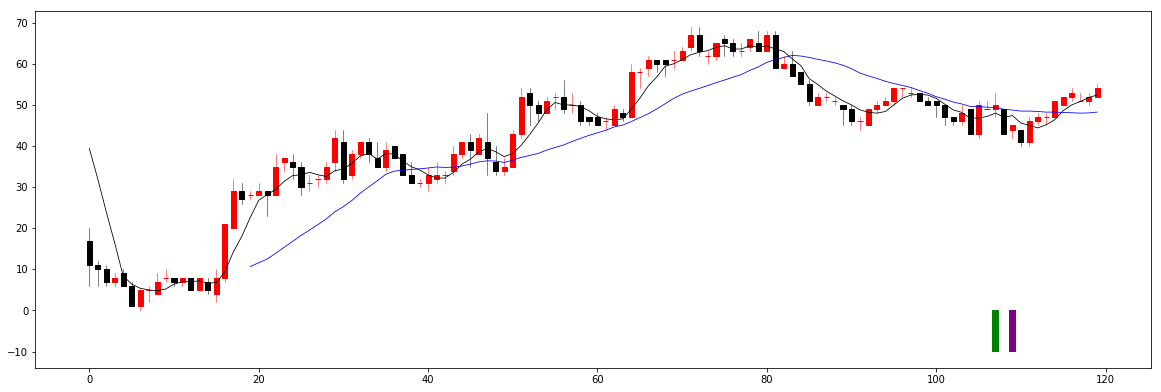

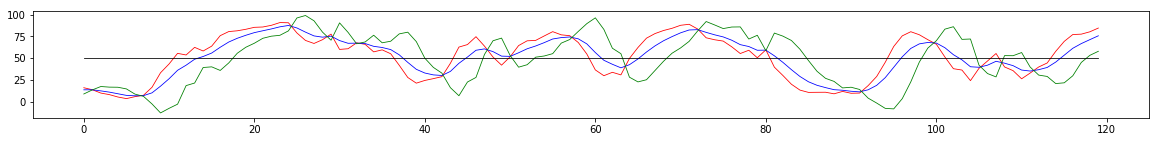

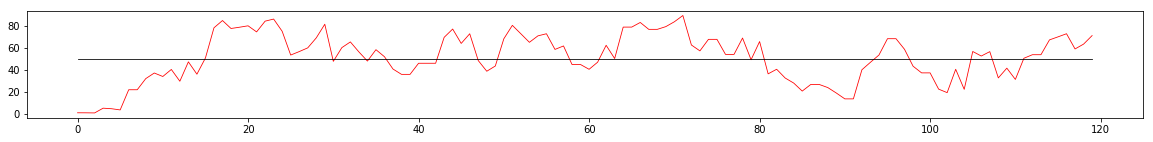

buy 73 [11010]
sell val 74 [2] 11012 [11010]
sell val 75 [2] 11012 [11010]
sell val 76 [7] 11017 [11010]
sell val 77 [11] 11021 [11010]
earn 11021 9.5
2018/8/9 9.5


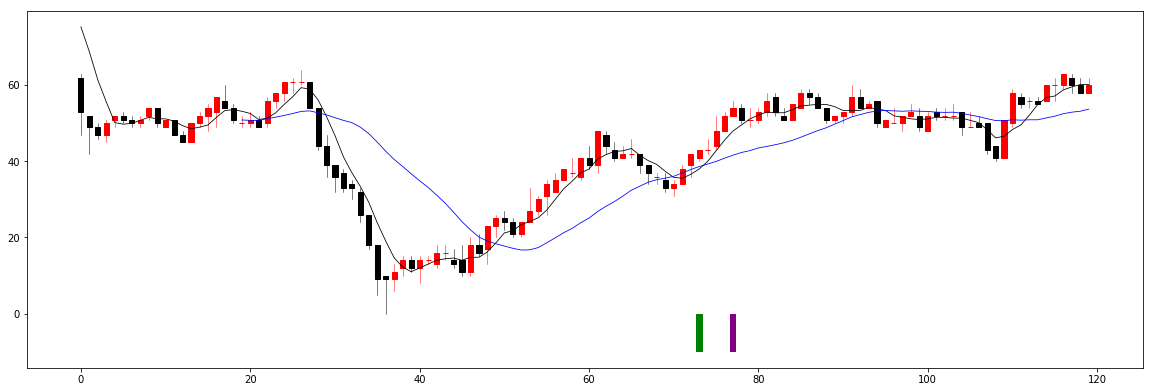

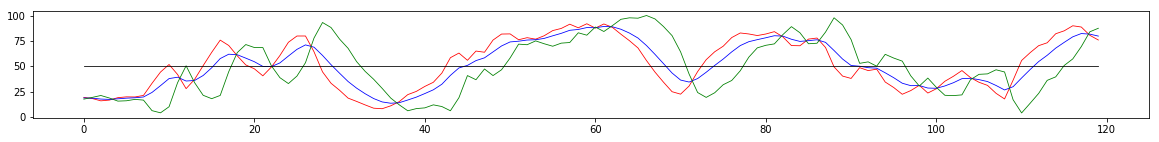

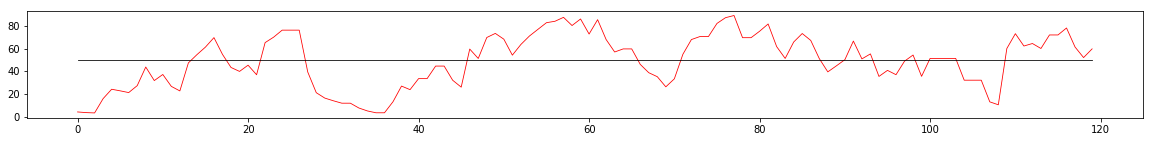

buy 49 [11055]
sell val 50 [-3] 11052 [11055]
sell val 51 [0] 11055 [11055]
sell val 52 [4] 11059 [11055]
sell val 53 [2] 11057 [11055]
sell val 54 [-2] 11053 [11055]
sell val 55 [-9] 11046 [11055]
earn 11047 -9.5
buy 61 [11052]
sell val 62 [1] 11053 [11052]
sell val 63 [5] 11057 [11052]
sell val 64 [8] 11060 [11052]
earn 11060 6.5
buy 109 [11059]
sell val 110 [2] 11061 [11059]
sell val 111 [1] 11060 [11059]
sell val 112 [0] 11059 [11059]
sell val 113 [5] 11064 [11059]
sell val 114 [5] 11064 [11059]
sell val 115 [4] 11063 [11059]
sell val 116 [3] 11062 [11059]
sell val 117 [4] 11063 [11059]
earn 11062 1.5
2018/8/8 -1.5


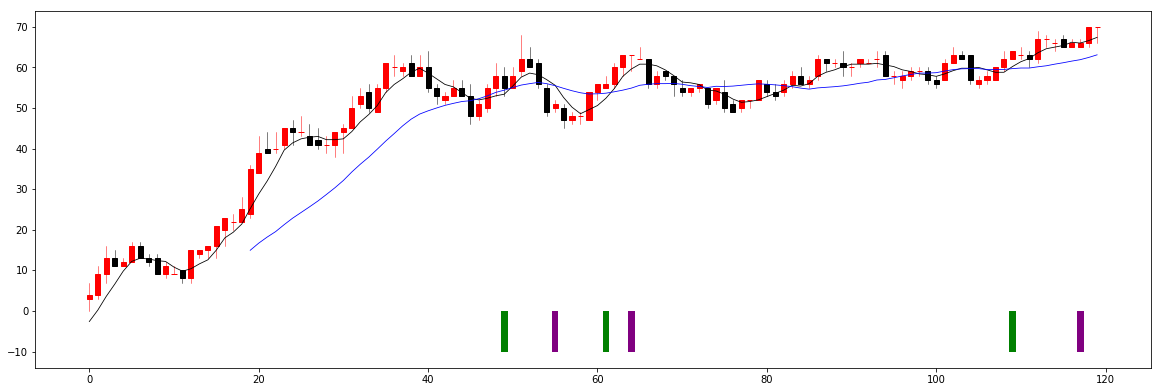

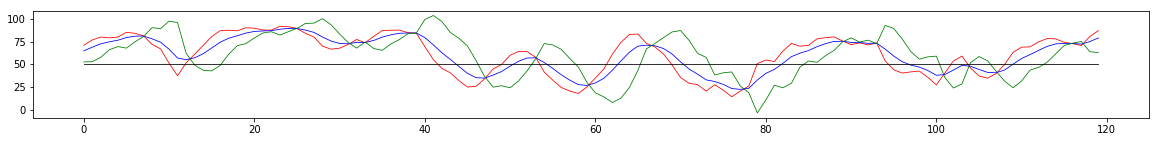

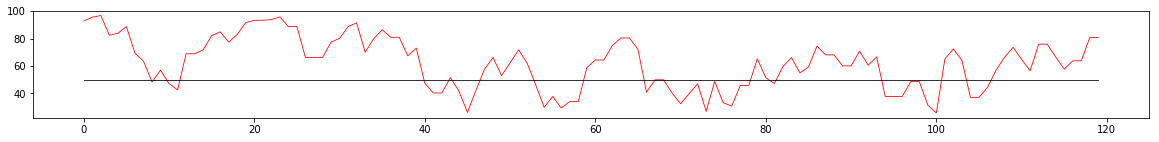

buy 6 [10980]
sell val 7 [1] 10981 [10980]
sell val 8 [1] 10981 [10980]
sell val 9 [-3] 10977 [10980]
sell val 10 [-3] 10977 [10980]
sell val 11 [-6] 10974 [10980]
sell val 12 [-8] 10972 [10980]
earn 10972 -9.5
buy 14 [10977]
sell val 15 [0] 10977 [10977]
sell val 16 [-4] 10973 [10977]
sell val 17 [1] 10978 [10977]
sell val 18 [4] 10981 [10977]
sell val 19 [4] 10981 [10977]
sell val 20 [1] 10978 [10977]
sell val 21 [4] 10981 [10977]
sell val 22 [2] 10979 [10977]
sell val 23 [1] 10978 [10977]
earn 10978 -0.5
buy 37 [10975]
sell val 38 [0] 10975 [10975]
sell val 39 [-2] 10973 [10975]
sell val 40 [-3] 10972 [10975]
sell val 41 [3] 10978 [10975]
sell val 42 [4] 10979 [10975]
sell val 43 [8] 10983 [10975]
earn 10983 6.5
2018/8/7 -3.5


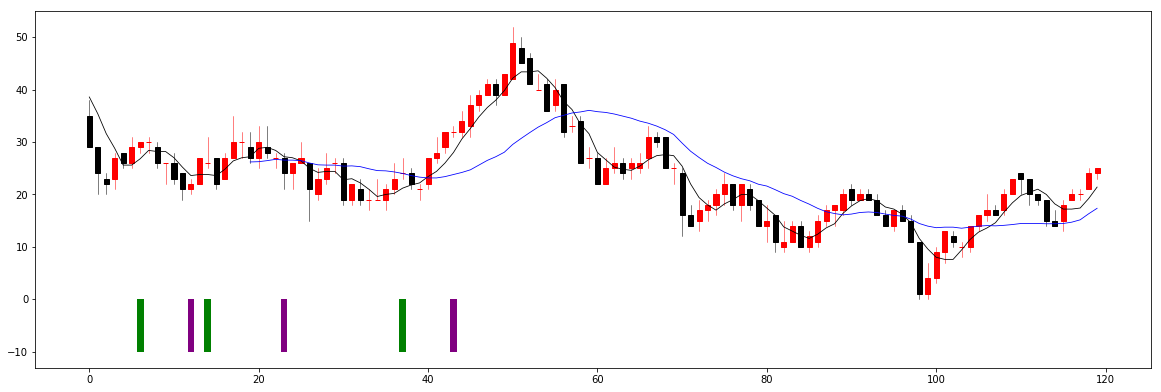

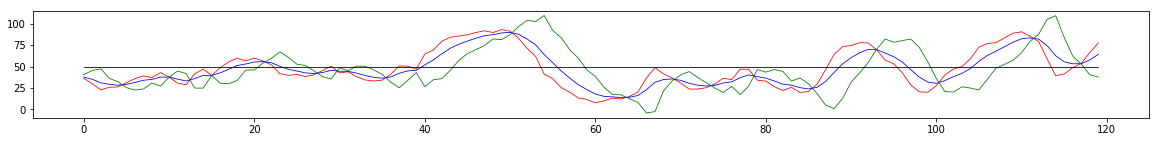

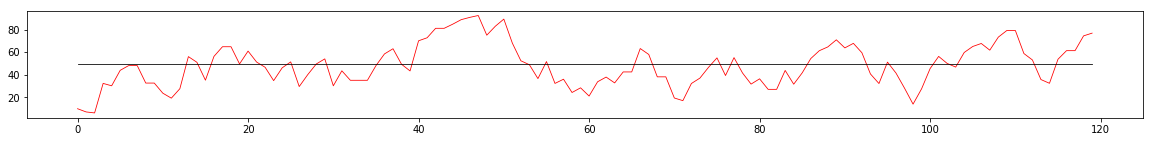

buy 57 [10993]
sell val 58 [-8] 10985 [10993]
earn 10986 -8.5
buy 90 [11029]
sell val 91 [0] 11029 [11029]
sell val 92 [-6] 11023 [11029]
earn 11024 -6.5
2018/8/6 -15.0


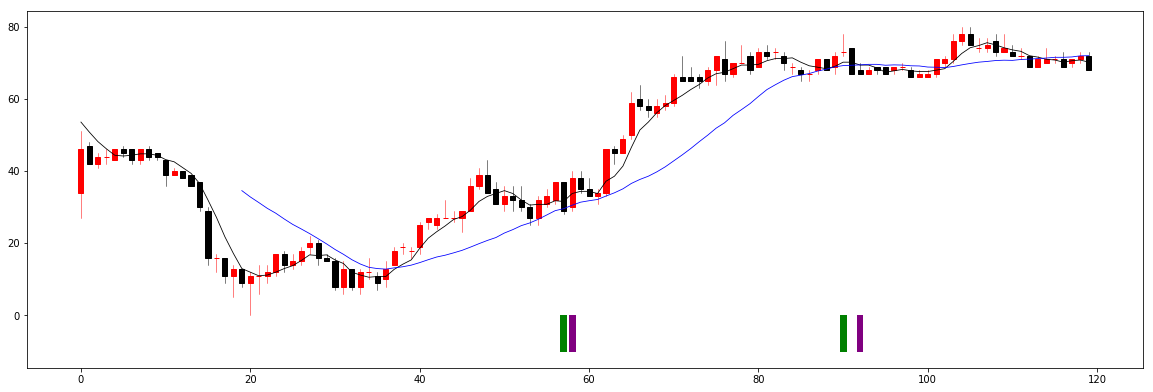

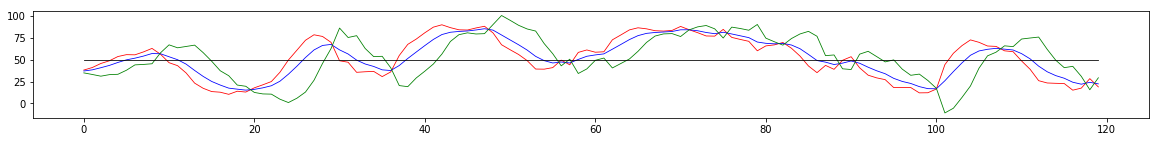

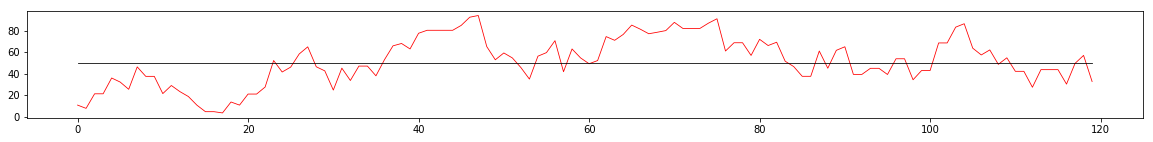

buy 28 [10947]
sell val 29 [-1] 10946 [10947]
sell val 30 [4] 10951 [10947]
sell val 31 [3] 10950 [10947]
sell val 32 [-6] 10941 [10947]
earn 10940 -8.5
buy 93 [10961]
sell val 94 [1] 10962 [10961]
sell val 95 [5] 10966 [10961]
sell val 96 [3] 10964 [10961]
sell val 97 [1] 10962 [10961]
sell val 98 [2] 10963 [10961]
sell val 99 [3] 10964 [10961]
sell val 100 [2] 10963 [10961]
sell val 101 [6] 10967 [10961]
sell val 102 [8] 10969 [10961]
earn 10968 5.5
2018/8/3 -3.0


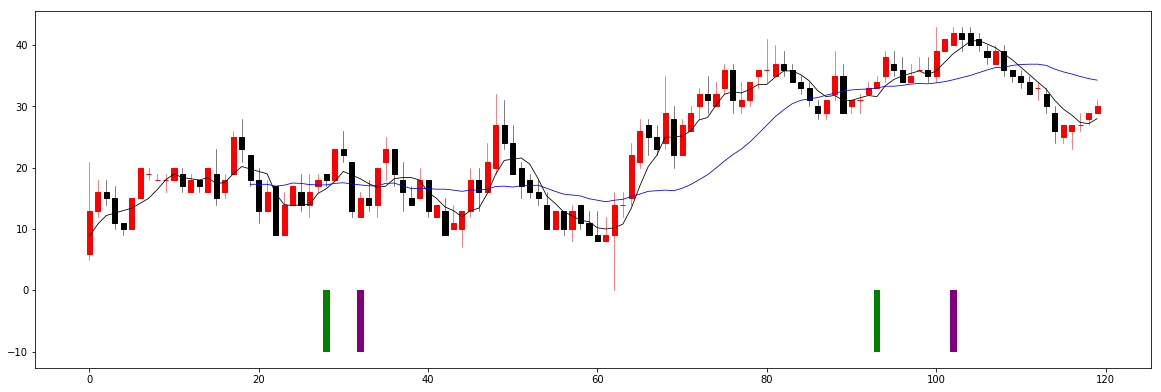

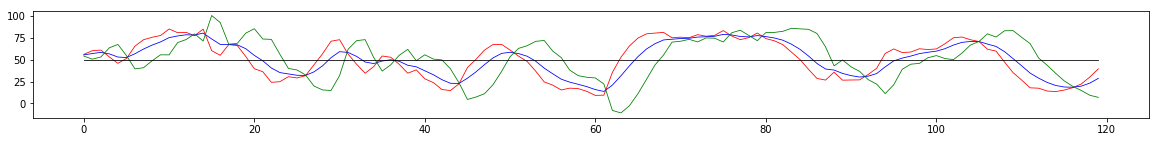

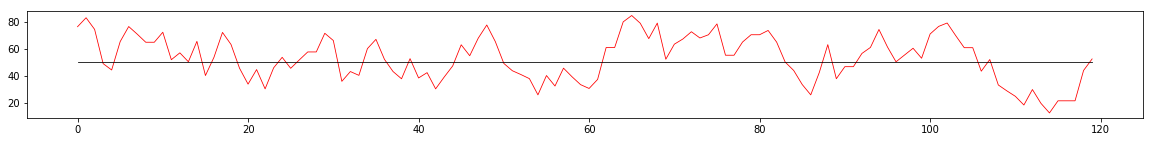

buy 101 [10960]
sell val 102 [2] 10962 [10960]
sell val 103 [6] 10966 [10960]
sell val 104 [2] 10962 [10960]
sell val 105 [5] 10965 [10960]
sell val 106 [1] 10961 [10960]
sell val 107 [-1] 10959 [10960]
sell val 108 [-4] 10956 [10960]
earn 10956 -5.5
2018/8/2 -5.5


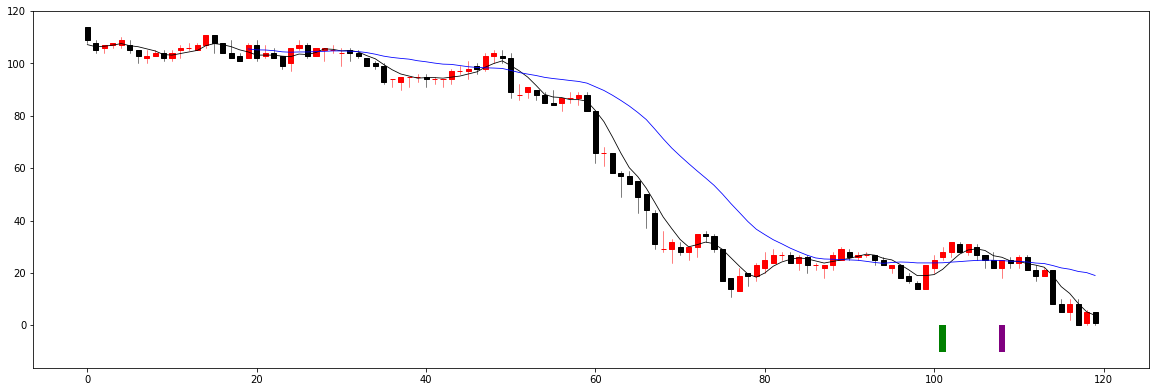

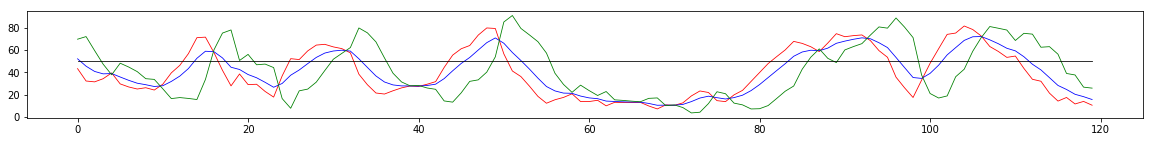

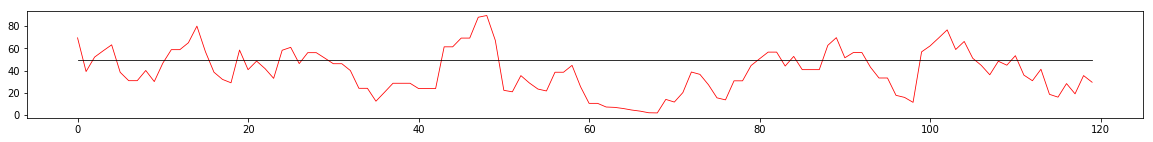

2018/8/1 0


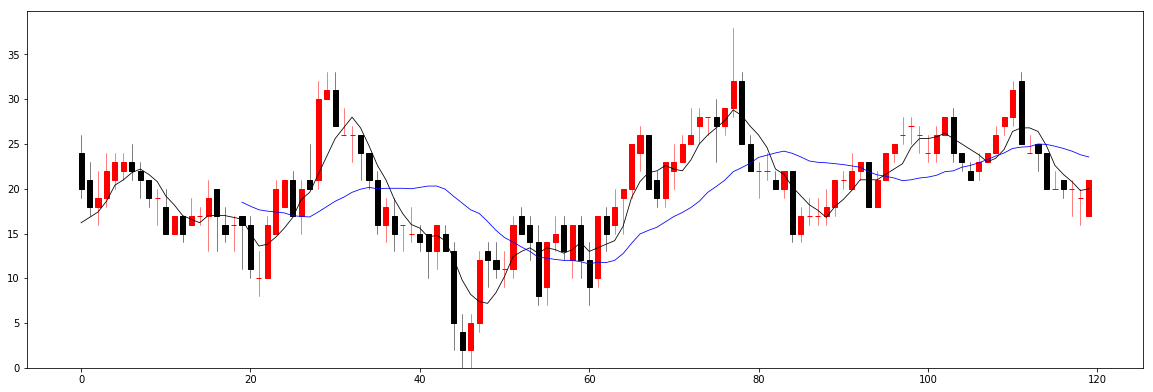

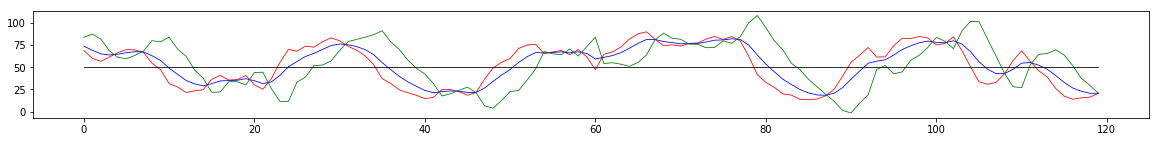

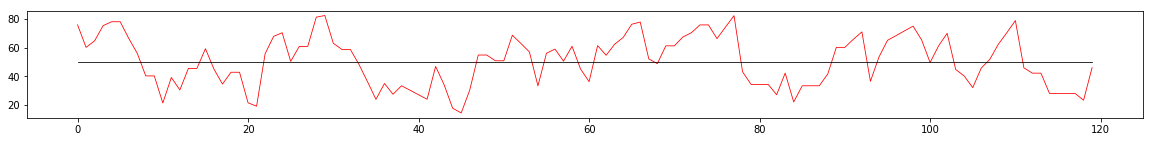

buy 7 [10934]
sell val 8 [-2] 10932 [10934]
sell val 9 [-4] 10930 [10934]
sell val 10 [-3] 10931 [10934]
sell val 11 [-2] 10932 [10934]
sell val 12 [-2] 10932 [10934]
sell val 13 [-4] 10930 [10934]
sell val 14 [-7] 10927 [10934]
earn 10926 -9.5
2018/7/31 -9.5


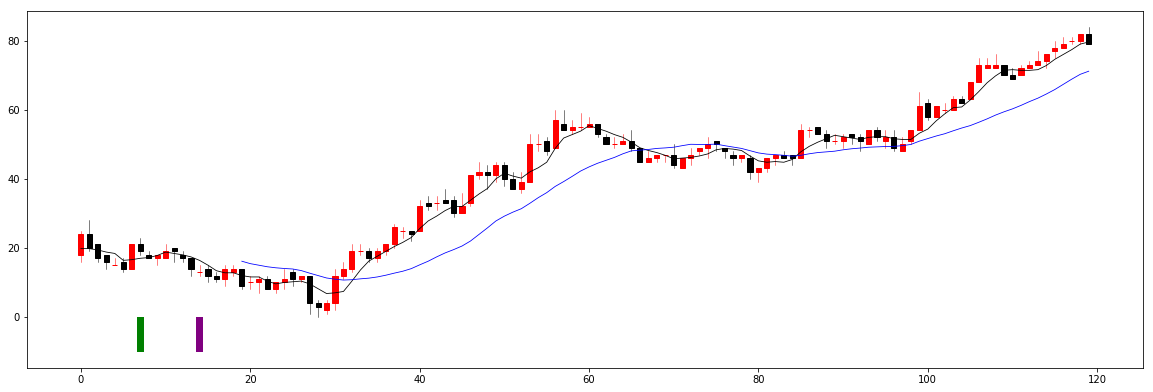

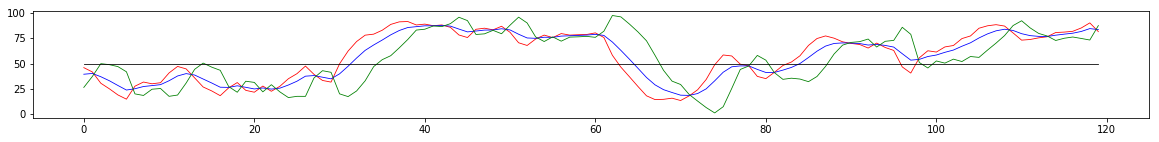

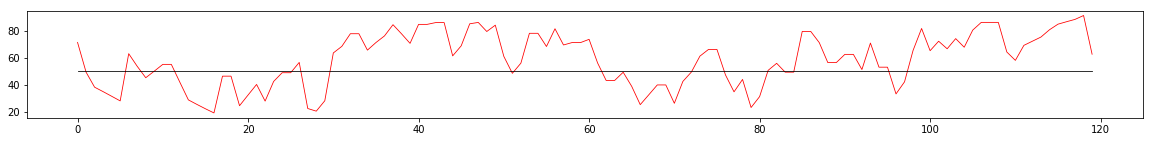

buy 33 [10987]
sell val 34 [-12] 10975 [10987]
earn 10975 -13.5
buy 37 [10985]
sell val 38 [2] 10987 [10985]
sell val 39 [1] 10986 [10985]
sell val 40 [-2] 10983 [10985]
sell val 41 [-5] 10980 [10985]
sell val 42 [-5] 10980 [10985]
earn 10981 -5.5
buy 47 [10991]
sell val 48 [0] 10991 [10991]
sell val 49 [2] 10993 [10991]
sell val 50 [12] 11003 [10991]
earn 11003 10.5
buy 63 [10978]
sell val 64 [0] 10978 [10978]
sell val 65 [3] 10981 [10978]
sell val 66 [5] 10983 [10978]
sell val 67 [8] 10986 [10978]
earn 10986 6.5
2018/7/30 -2.0


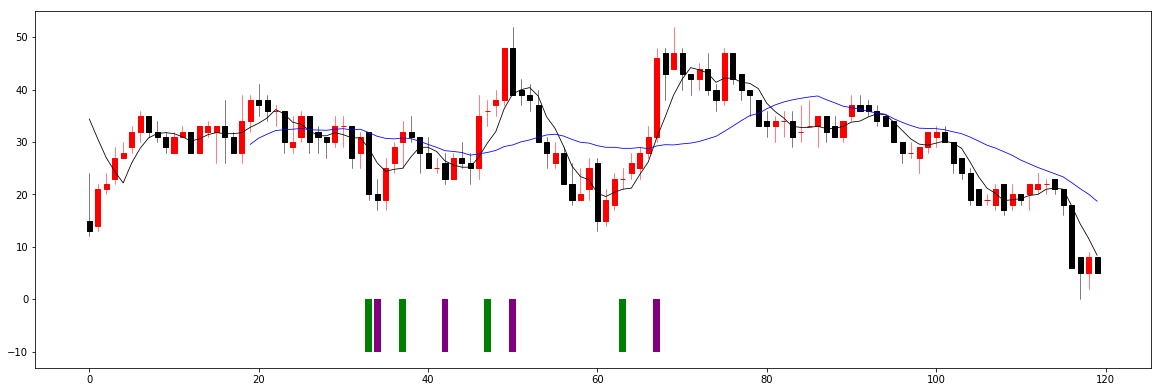

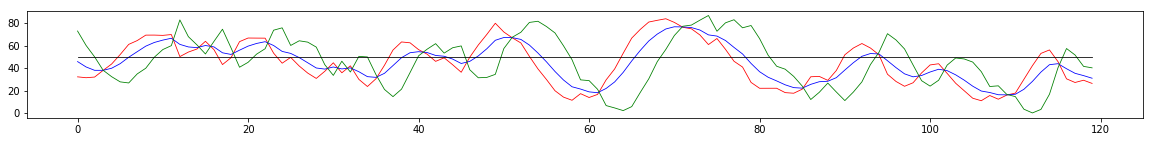

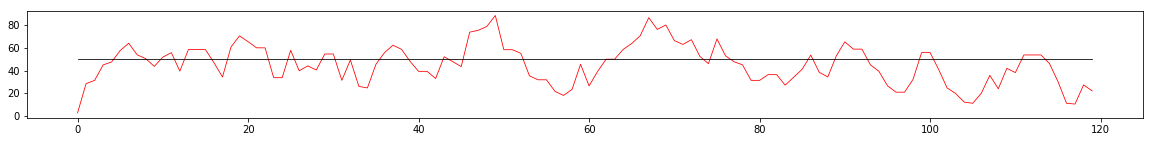

2018/7/27 0


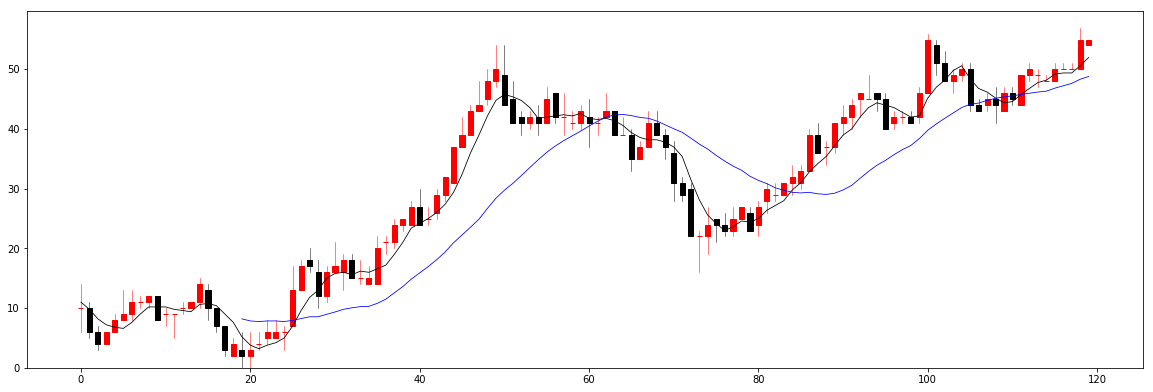

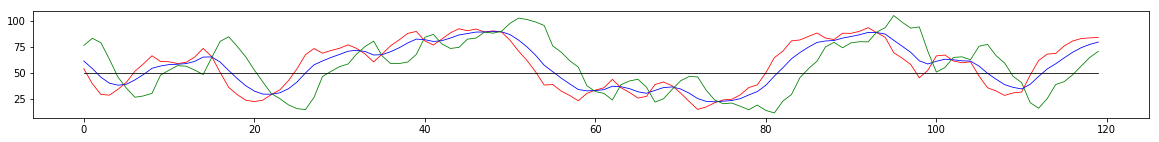

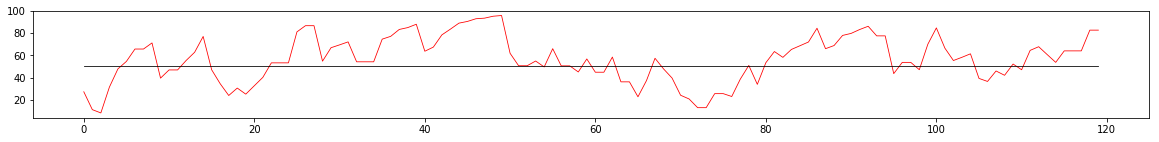

buy 36 [10909]
sell val 37 [-3] 10906 [10909]
sell val 38 [4] 10913 [10909]
sell val 39 [5] 10914 [10909]
sell val 40 [4] 10913 [10909]
sell val 41 [6] 10915 [10909]
sell val 42 [7] 10916 [10909]
sell val 43 [9] 10918 [10909]
earn 10918 7.5
buy 73 [10904]
sell val 74 [-3] 10901 [10904]
earn 10901 -4.5
2018/7/26 3.0


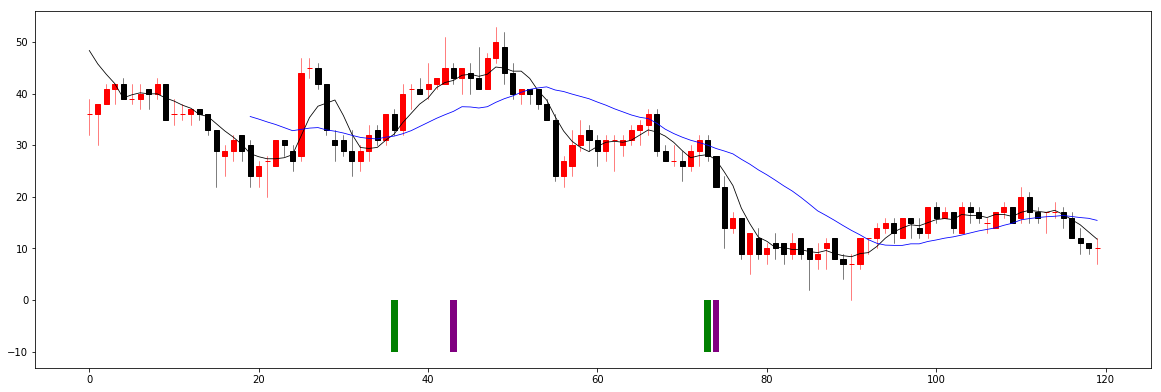

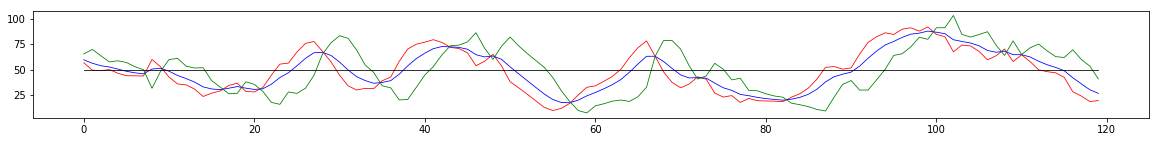

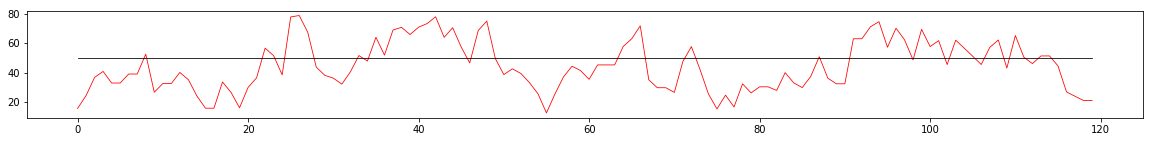

buy 60 [10869]
sell val 61 [-1] 10868 [10869]
sell val 62 [-3] 10866 [10869]
sell val 63 [4] 10873 [10869]
sell val 64 [3] 10872 [10869]
sell val 65 [3] 10872 [10869]
sell val 66 [11] 10880 [10869]
earn 10880 9.5
2018/7/25 9.5


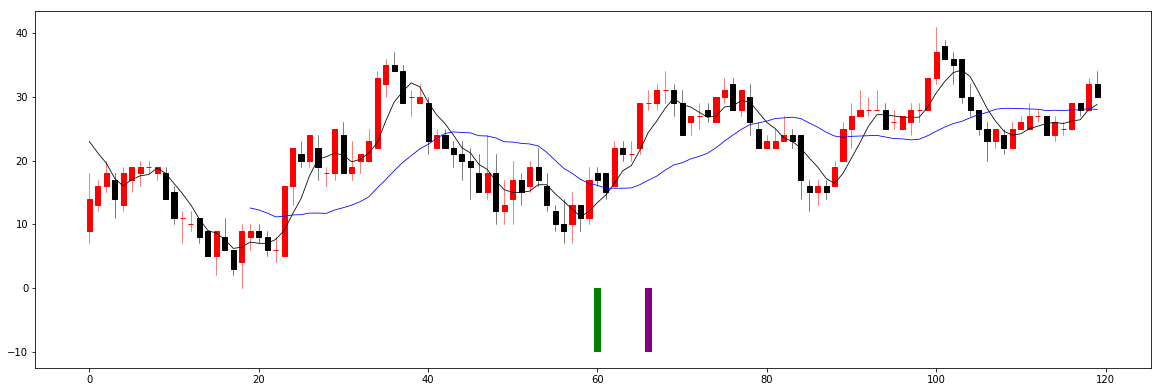

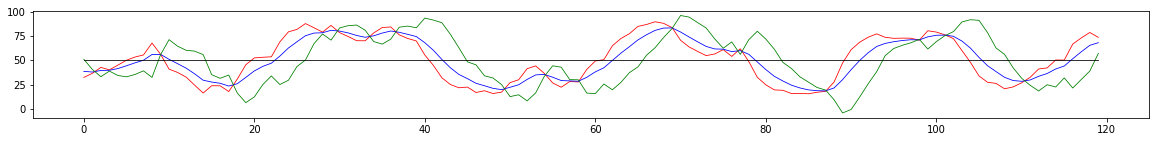

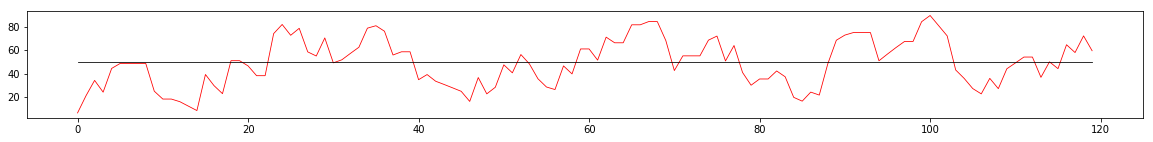

buy 12 [10822]
sell val 13 [-1] 10821 [10822]
sell val 14 [-2] 10820 [10822]
sell val 15 [2] 10824 [10822]
sell val 16 [-8] 10814 [10822]
sell val 17 [-3] 10819 [10822]
sell val 18 [-6] 10816 [10822]
sell val 19 [-4] 10818 [10822]
sell val 20 [0] 10822 [10822]
sell val 21 [3] 10825 [10822]
sell val 22 [4] 10826 [10822]
sell val 23 [-4] 10818 [10822]
sell val 24 [-3] 10819 [10822]
earn 10820 -3.5
buy 39 [10809]
sell val 40 [3] 10812 [10809]
sell val 41 [10] 10819 [10809]
earn 10819 8.5
buy 86 [10836]
sell val 87 [4] 10840 [10836]
sell val 88 [0] 10836 [10836]
sell val 89 [0] 10836 [10836]
sell val 90 [-3] 10833 [10836]
sell val 91 [1] 10837 [10836]
sell val 92 [3] 10839 [10836]
sell val 93 [4] 10840 [10836]
sell val 94 [5] 10841 [10836]
sell val 95 [7] 10843 [10836]
sell val 96 [5] 10841 [10836]
sell val 97 [0] 10836 [10836]
earn 10836 -1.5
buy 114 [10843]
sell val 115 [-1] 10842 [10843]
sell val 116 [3] 10846 [10843]
sell val 117 [1] 10844 [10843]
sell val 118 [6] 10849 [10843]
earn 10

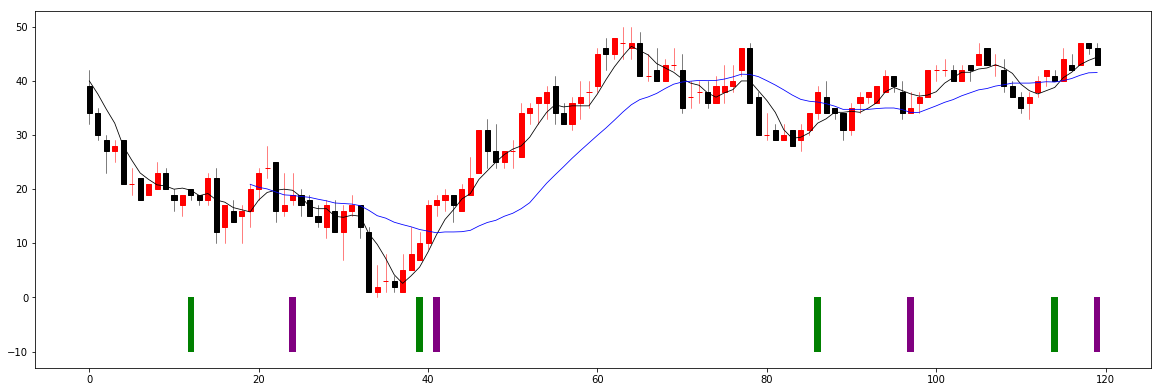

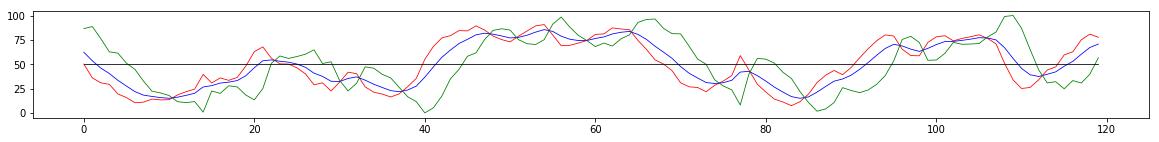

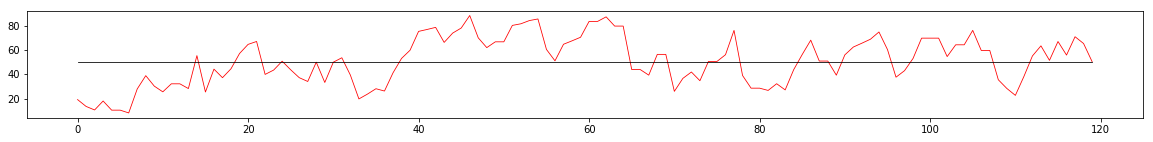

2018/7/23 0


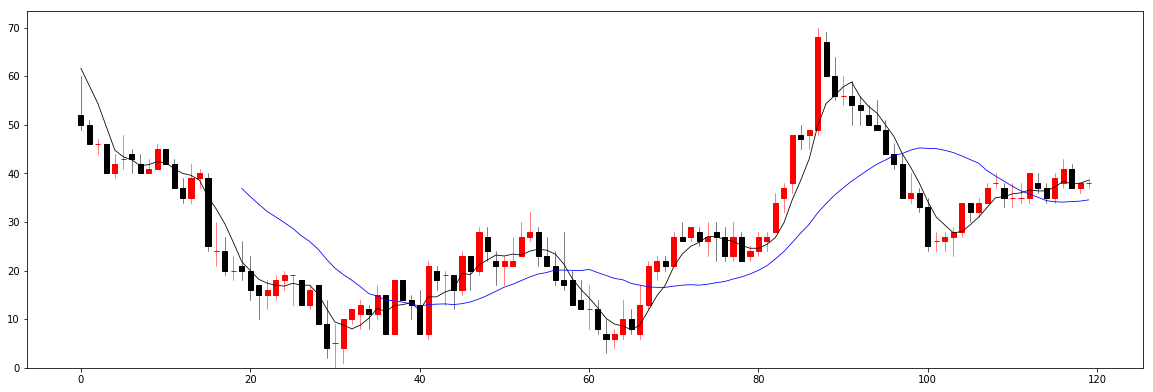

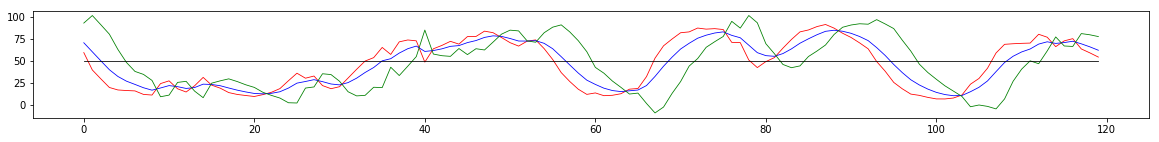

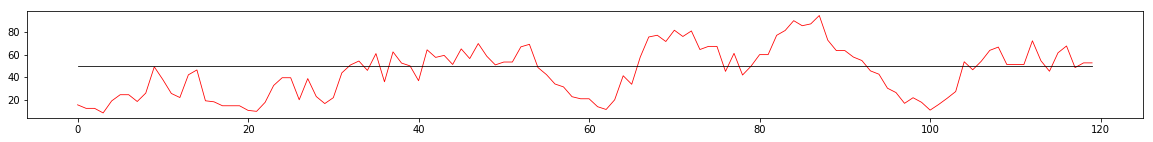

buy 78 [10781]
sell val 79 [0] 10781 [10781]
sell val 80 [3] 10784 [10781]
sell val 81 [11] 10792 [10781]
earn 10792 9.5
2018/7/20 9.5


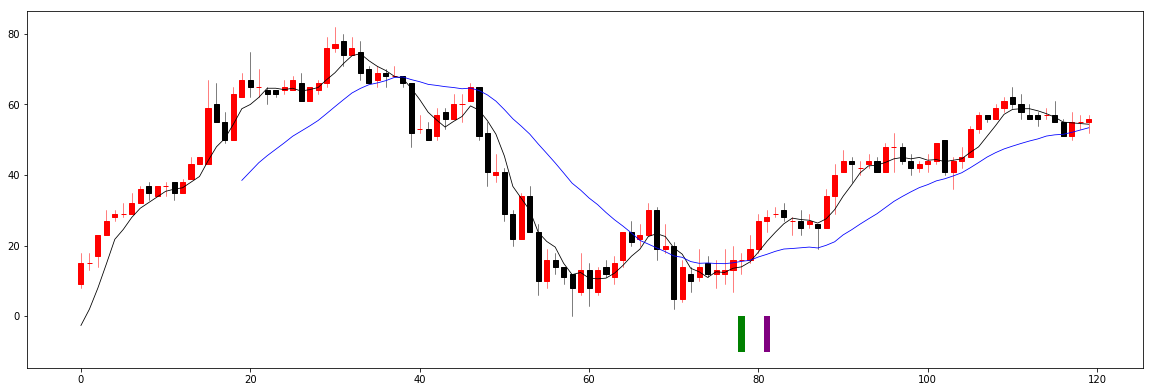

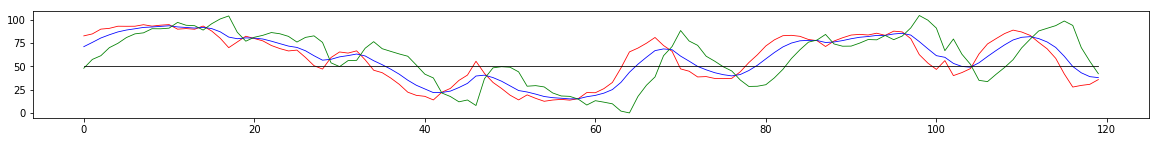

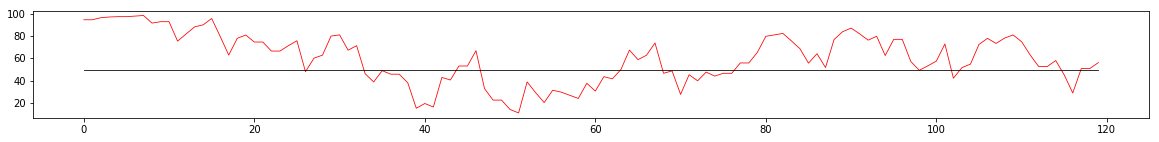

buy 23 [10758]
sell val 24 [0] 10758 [10758]
sell val 25 [1] 10759 [10758]
sell val 26 [-2] 10756 [10758]
sell val 27 [-3] 10755 [10758]
sell val 28 [-4] 10754 [10758]
sell val 29 [-5] 10753 [10758]
earn 10754 -5.5
buy 55 [10769]
sell val 56 [-4] 10765 [10769]
sell val 57 [-4] 10765 [10769]
sell val 58 [3] 10772 [10769]
sell val 59 [4] 10773 [10769]
sell val 60 [12] 10781 [10769]
earn 10781 10.5
buy 76 [10785]
sell val 77 [-6] 10779 [10785]
earn 10780 -6.5
2018/7/19 -1.5


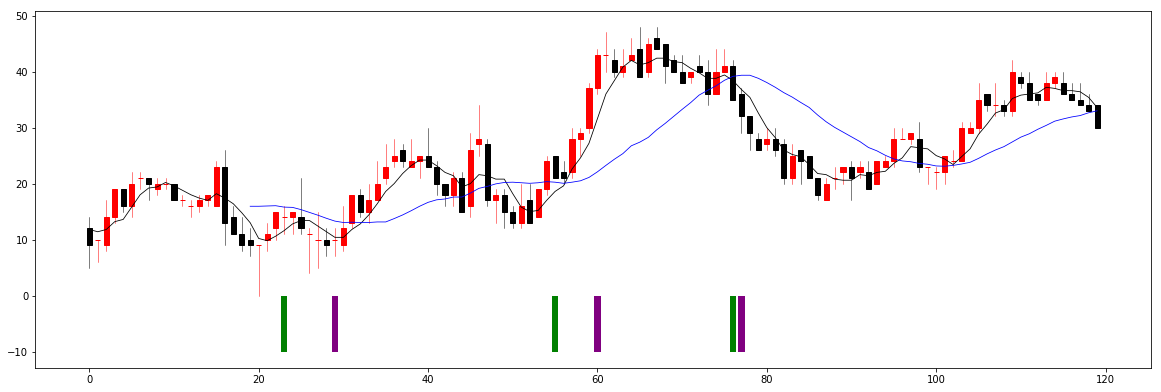

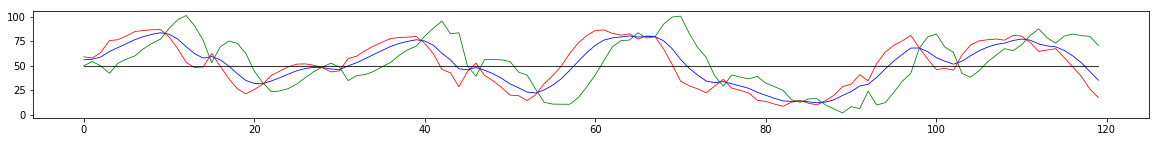

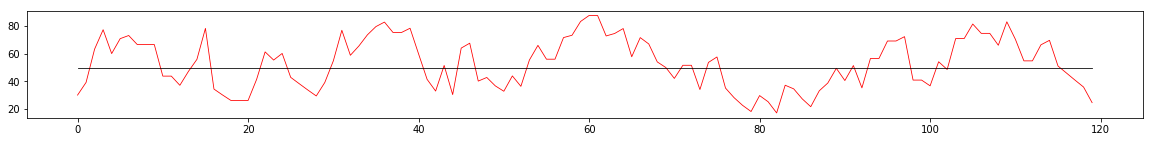

buy 23 [10831]
sell val 24 [-4] 10827 [10831]
sell val 25 [-9] 10822 [10831]
earn 10822 -10.5
buy 26 [10827]
sell val 27 [-3] 10824 [10827]
earn 10823 -5.5
buy 32 [10828]
sell val 33 [-2] 10826 [10828]
sell val 34 [-2] 10826 [10828]
sell val 35 [-1] 10827 [10828]
sell val 36 [-7] 10821 [10828]
earn 10821 -8.5
buy 49 [10823]
sell val 50 [-3] 10820 [10823]
sell val 51 [-4] 10819 [10823]
sell val 52 [0] 10823 [10823]
sell val 53 [2] 10825 [10823]
sell val 54 [5] 10828 [10823]
sell val 55 [5] 10828 [10823]
sell val 56 [3] 10826 [10823]
sell val 57 [0] 10823 [10823]
earn 10823 -1.5
2018/7/18 -26.0


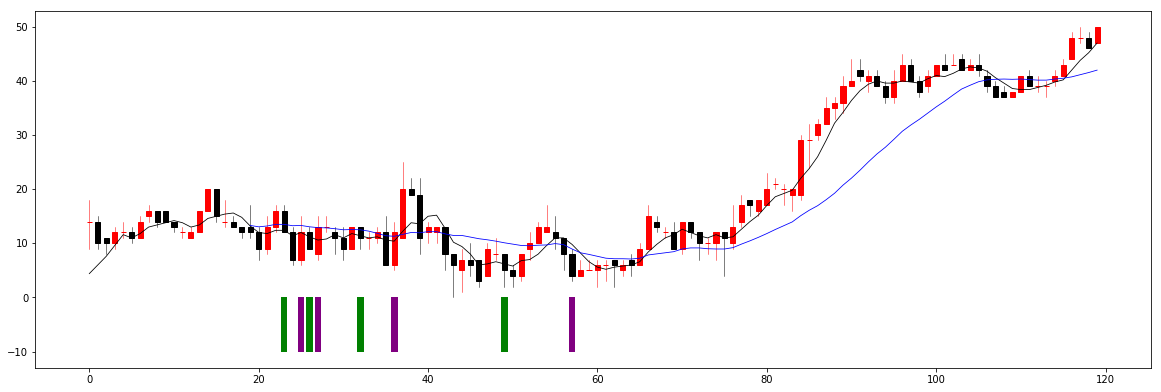

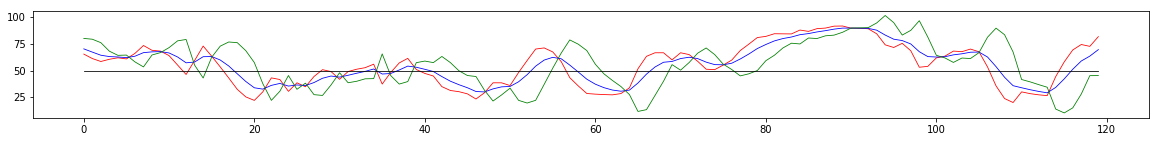

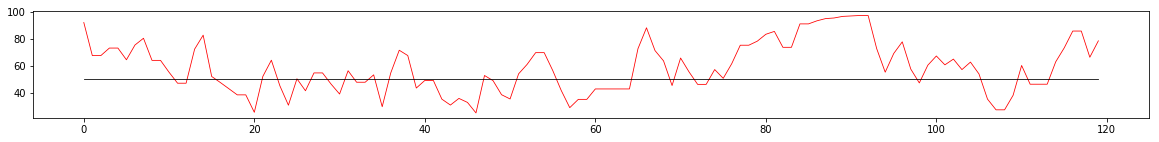

((0, 0, 0), -211.93)


NameError: global name 'is_print' is not defined

In [6]:
eval(days, buy_func='KD_GC', sell_func='KD_DC')
# eval(days, buy_func='KD_GC', sell_func='KD_Dec')
# eval(days, buy_func='KD_GC', sell_func='MA5_Dec')